In [1]:

import pickle
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
resultsDict = dict()
sweepsDict = dict()

datasets = ['German', 'Homecredit', 'Simulation']
datasets = ['German', 'Simulation']

operations = ['OR', 'AND', 'XOR']
cases = ['ind', 'com']

tuples_of_cases = {case: tuple('2V_' + operation + '_' + case + '_1' for operation in operations) for case in cases}

In [3]:
tuples_of_cases

{'ind': ('2V_OR_ind_1', '2V_AND_ind_1', '2V_XOR_ind_1'),
 'com': ('2V_OR_com_1', '2V_AND_com_1', '2V_XOR_com_1')}

In [4]:
for data in datasets:
    resultsDict[data] = dict()
    sweepsDict[data] = dict()
    for file in os.listdir('results/best/' + data):
        name = file[:-12]

        path_results = 'results/best/' + data + '/' + name + '_best.pickle'
        path_sweeps = 'results/sweep/' + data + '/' + name + '_sweep.pickle'

        with open(path_results, 'rb') as handle:    
            resultsDict[data][name] = pickle.load(handle)
        with open(path_sweeps, 'rb') as handle:
            sweepsDict[data][name] = pickle.load(handle)

names = resultsDict.keys()

In [5]:
def tidy_dataset(dataset):
    new_table = dataset.copy(deep = True)
    
    colNames = dataset.columns
    subset = [column for column in colNames if column not in ['best_threshold']]
    new_table.loc[:, subset] =  (new_table.loc[:, subset] - new_table.loc['logreg', subset])/new_table.loc['logreg', subset]*100
    return new_table



def compare_tables(dataset1, dataset2):
    new_table = dataset1.copy(deep = True) 
    new_table =  (dataset2 - dataset1)/dataset1*100
    return new_table



def obtain_results(name):

    comparison_log = dict()

    for name in datasets:
        comparison_log[name] = dict()
        for case in resultsDict[name].keys():
            comparison_log[name][case] = tidy_dataset(resultsDict[name][case])

    comparison_pair = dict()

    for name in datasets:
        comparison_pair[name] = dict() 
        for case in cases:
            comparison_pair[name][case] = dict()
            data1V = name + '1V_' + case + '_1'
            for operation in operations:
                data2V = name + '2V_' + operation + '_' + case + '_1'
                comparison_pair[name][case][operation] = dict()
                comparison_pair[name][case][operation] = compare_tables(resultsDict[name][data1V], resultsDict[name][data2V])

    return comparison_log, comparison_pair

    

In [6]:
resultsDict

{'German': {'German1V_com_1':                 best_threshold   bal_acc       acc  independence  separation  \
  logreg                0.797959  0.701152  0.640000      0.196650    0.168031   
  xgboost               0.676735  0.708628  0.706667      0.173697    0.052706   
  RW_logreg             0.717143  0.661063  0.658679      0.156145    0.135985   
  DI_logreg             0.818163  0.676702  0.600000      0.178660    0.182776   
  RW_xgboost            0.737347  0.678318  0.686368      0.152348    0.209217   
  ...                        ...       ...       ...           ...         ...   
  pir_eqOdds_fnr        0.494898  0.574156  0.660000      0.377171    0.113378   
  pir_eqOdds_fpr        0.818163  0.691857  0.613333      0.318238    0.229780   
  pir_RejOpt_spd        0.643535  0.699636  0.673333      0.178040    0.226834   
  pir_RejOpt_aod        0.603939  0.678622  0.673333      0.242556    0.195768   
  pir_RejOpt_eod        0.653434  0.683876  0.673333      0.226427    

In [7]:
cases

['ind', 'com']

In [8]:
resultsDict['German'].keys()

dict_keys(['German1V_com_1', 'German1V_ind_1', 'German2V_AND_com_1', 'German2V_AND_ind_1', 'German2V_OR_com_1', 'German2V_OR_ind_1', 'German2V_XOR_com_1', 'German2V_XOR_ind_1'])

In [9]:
new_tables, tables_pairs = obtain_results('German')

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'float_format', "{:,.2f}".format):  # more options can be specified also
    display(new_tables['German']['German2V_OR_com_1'])

best_threshold  bal_acc    acc  independence  \
logreg                             0.80     0.00   0.00          0.00   
xgboost                            0.68     1.07  10.42        -11.67   
RW_logreg                          0.19   -22.82   8.33        -94.95   
DI_logreg                          0.84    -5.61  -9.38         25.87   
RW_xgboost                         0.11   -24.32   8.33        -88.64   
DI_xgboost                         0.80    -0.22   5.21        -56.78   
RW_adversarial                     0.01   -28.69   5.21       -100.00   
DI_adversarial                     0.96   -31.21  -6.25        -68.45   
RW_metafair                        0.25   -27.81   2.08        -74.13   
DI_metafair                        0.56     1.15   8.33        -12.62   
RW_pir                             0.82   -24.57 -21.88        -50.47   
DI_pir                             0.82    -1.37  -3.13         26.81   
metafair_sr                        0.47     2.48  12.50         67.51   
metafair_fdr                       0.66    -5.69  -7.29        -20.50   
pir                                0.80     0.04  -1.04         35.60   
adversarial                        0.80    -4.50   0.00         16.77   
RW_logreg_Platt                    0.77   -11.25 -17.71         50.67   
RW_logreg_eqOdds                   0.68    -0.97   5.21         -1.26   
RW_logreg_RejOpt_spd               0.74   -28.52 -26.04        -78.49   
RW_logreg_RejOpt_aod               0.74   -25.64 -21.88        -94.13   
RW_logreg_RejOpt_eod               0.59   -31.61 -18.75        -88.26   
RW_xgboost_Platt                   0.69     1.20   7.29        186.28   
RW_xgboost_eqOdds                  0.70     1.77  11.46         -7.57   
RW_xgboost_RejOpt_spd              0.41   -25.89 -11.46        -43.28   
RW_xgboost_RejOpt_aod              0.58   -28.05 -14.58        -60.88   
RW_xgboost_RejOpt_eod              0.58   -28.05 -14.58        -60.88   
DI_logreg_Platt                    0.78   -11.92 -19.79         35.60   
DI_logreg_eqOdds                   0.84    -7.77 -11.46        -21.45   
DI_logreg_RejOpt_spd               0.65   -26.36 -22.92        -60.88   
DI_logreg_RejOpt_aod               0.68   -27.08 -23.96        -86.31   
DI_logreg_RejOpt_eod               0.74   -25.68 -22.92        -82.40   
DI_xgboost_Platt                   0.69     2.65   8.33        182.51   
DI_xgboost_eqOdds                  0.70     2.56  10.42        -51.74   
DI_xgboost_RejOpt_spd              0.44   -26.70 -14.58        -45.24   
DI_xgboost_RejOpt_aod              0.60   -29.58 -18.75        -58.93   
DI_xgboost_RejOpt_eod              0.60   -31.02 -20.83        -51.10   
adversarial_Platt                  0.76   -30.14 -50.00        -96.23   
adversarial_eqOdds                 0.80    -3.79   1.04          5.99   
adversarial_RejOpt_spd             0.72   -37.42 -28.12        -39.37   
adversarial_RejOpt_aod             0.74   -36.02 -27.08        -35.46   
adversarial_RejOpt_eod             0.75   -34.66 -27.08        -78.49   
metafair_sr_Platt                  0.59    -8.67  10.42        318.11   
metafair_sr_eqOdds                 0.47    -1.10   8.33         11.99   
metafair_sr_RejOpt_spd             0.50   -24.92 -20.83        -98.04   
metafair_sr_RejOpt_aod             0.48   -28.27 -19.79        -80.44   
metafair_sr_RejOpt_eod             0.55   -28.65 -29.17        -43.28   
metafair_fdr_Platt                 0.65    -3.96   5.21        216.41   
metafair_fdr_eqOdds                0.66    -4.99  -6.25        -63.72   
metafair_fdr_RejOpt_spd            0.59   -31.40 -30.21        -62.84   
metafair_fdr_RejOpt_aod            0.63   -27.88 -27.08        -58.93   
metafair_fdr_RejOpt_eod            0.57   -26.87 -18.75        -84.35   
pir_Platt                          0.79   -20.35 -33.33        -20.90   
pir_eqOdds                         0.80    -0.04   1.04        -82.33   
pir_RejOpt_spd                     0.58   -26.91 -19.79        -74.57   
pir_RejOpt

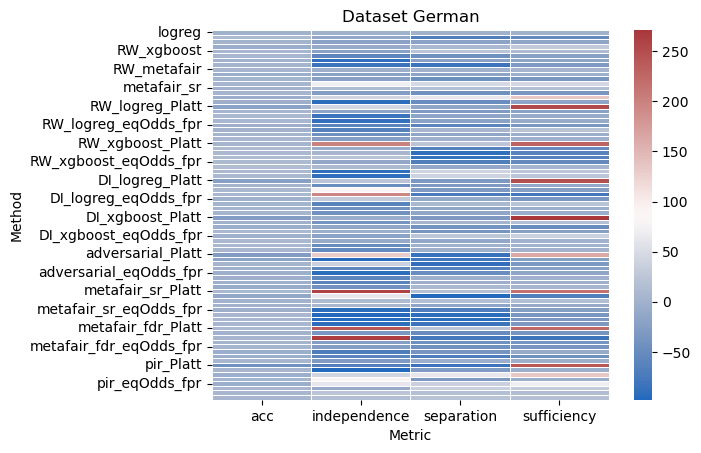

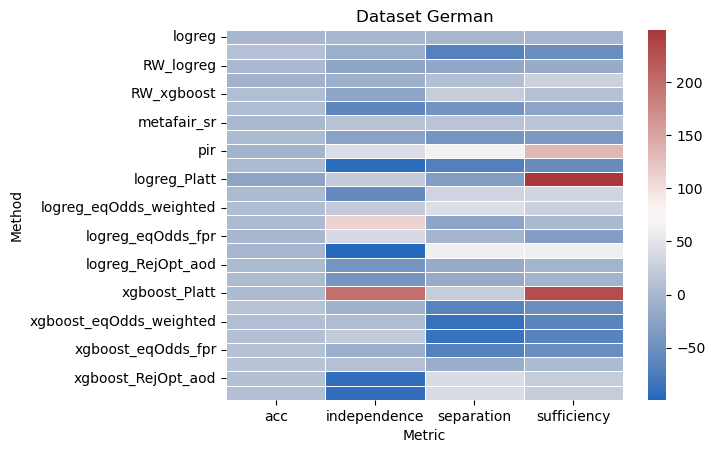

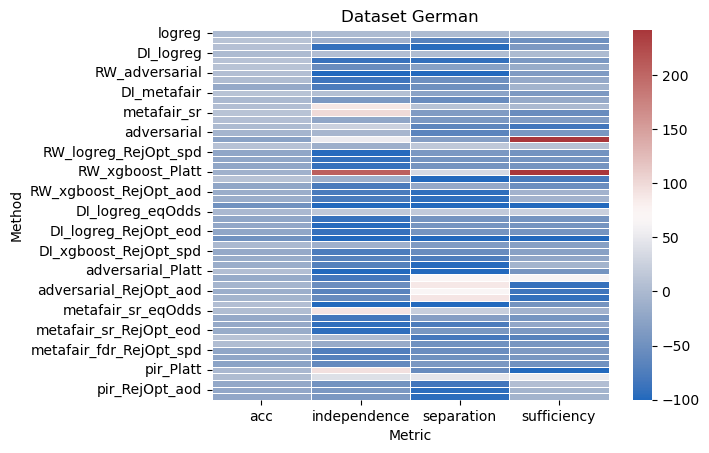

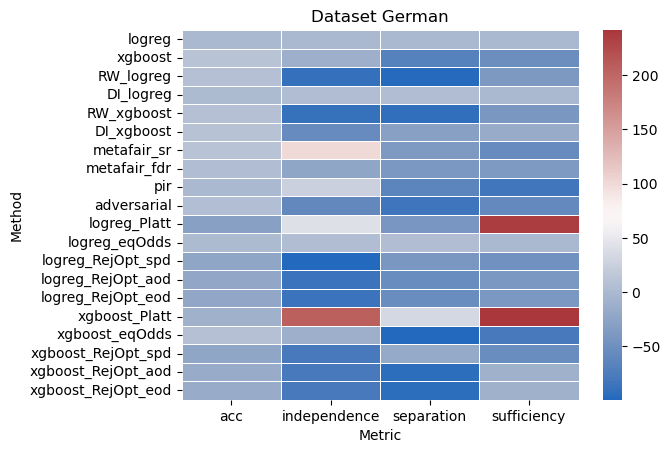

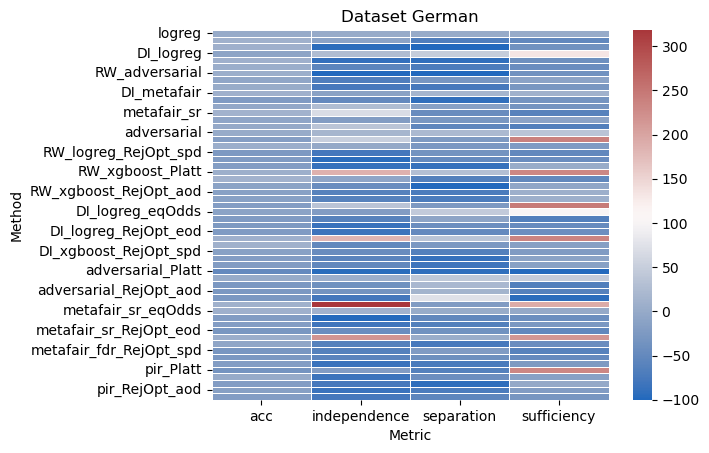

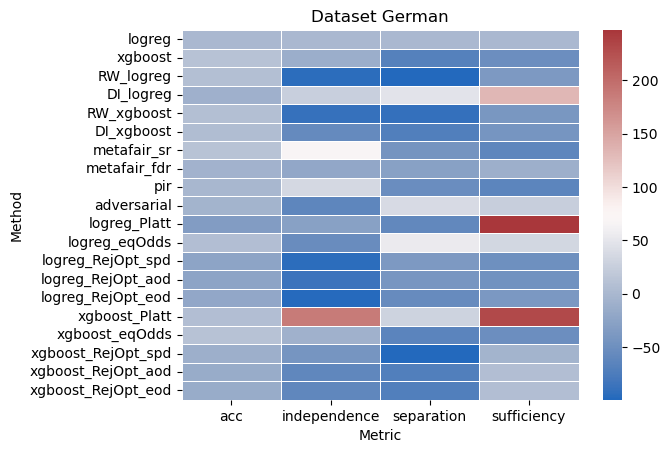

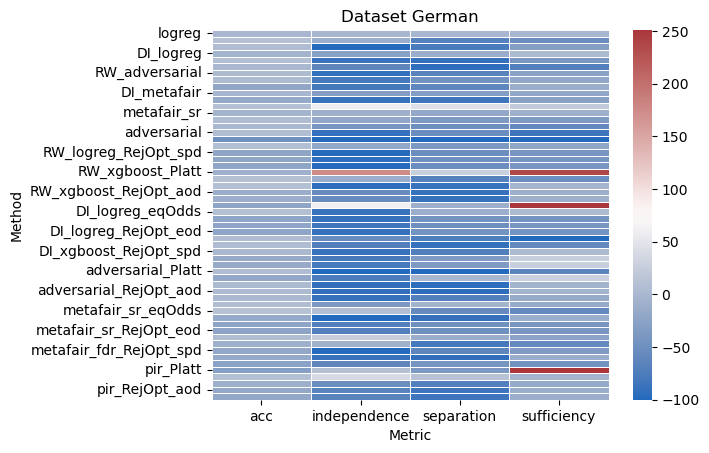

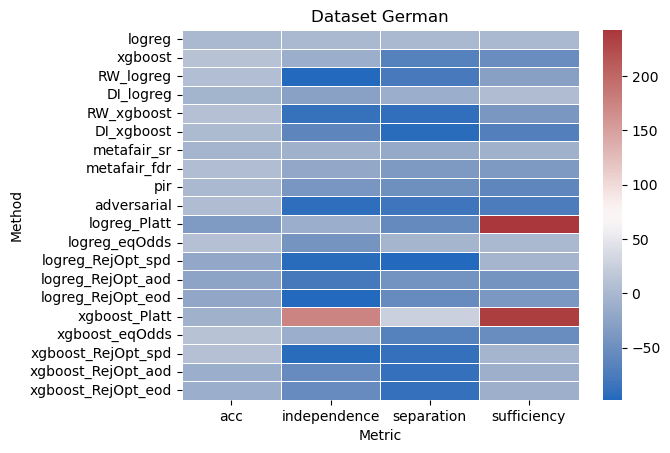

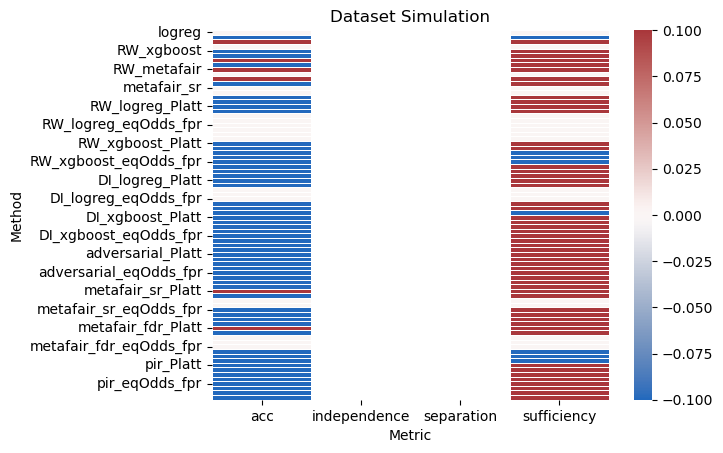

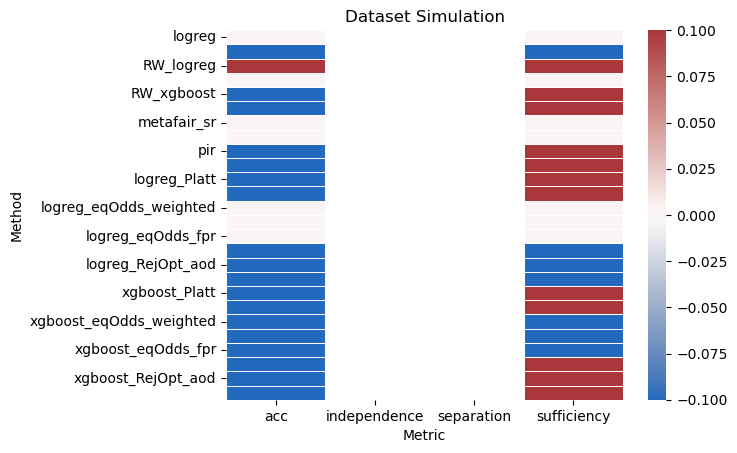

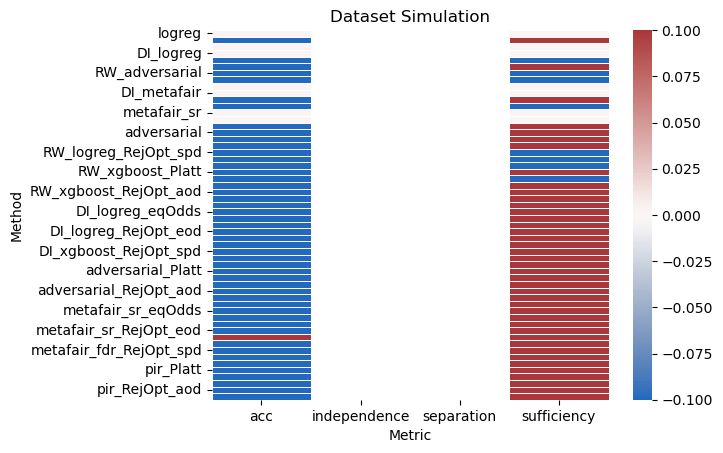

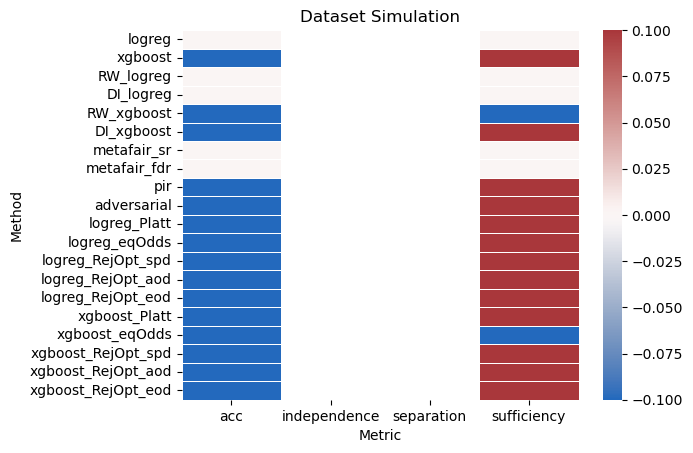

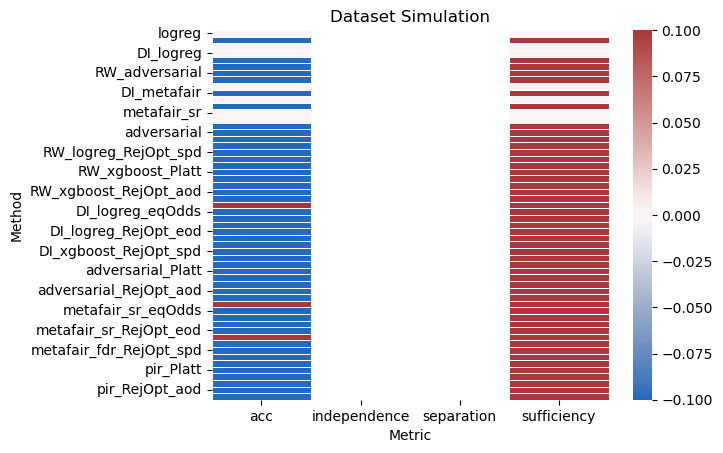

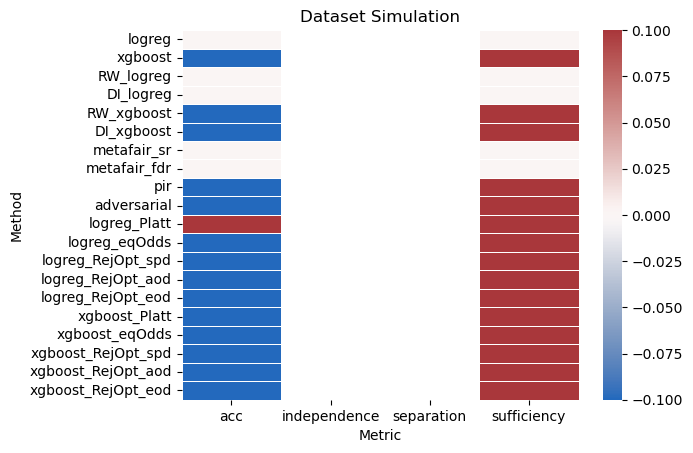

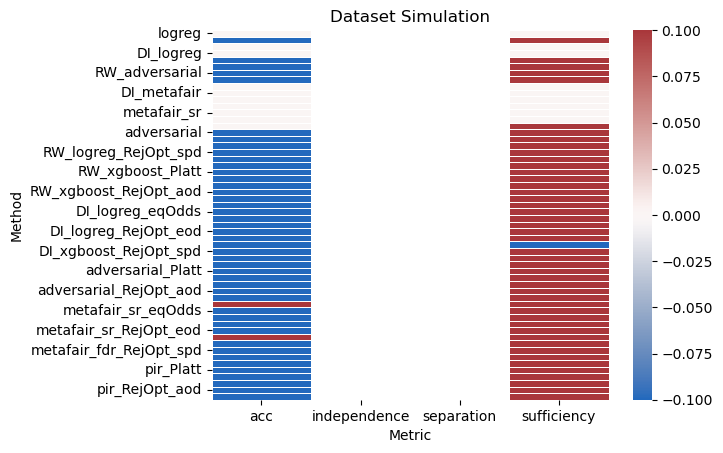

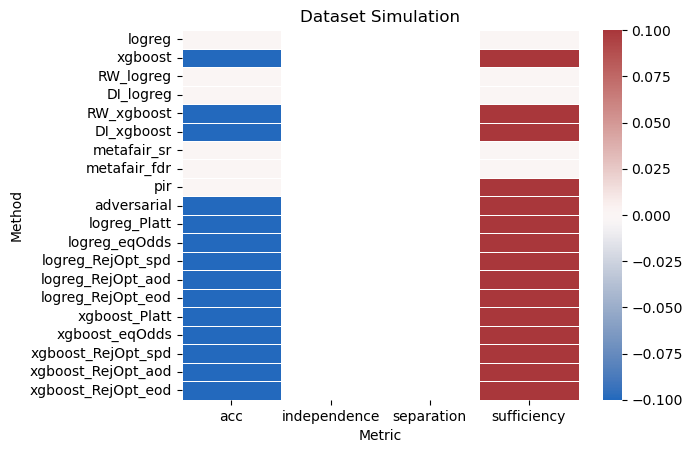

In [55]:
metrics = ['acc', 'independence', 'separation', 'sufficiency']

for name in datasets:
    for case in resultsDict[name].keys():
        ax = sns.heatmap(new_tables[name][case].loc[:, metrics], linewidth=0.5, cmap = "vlag")
        ax.set_xlabel('Metric')
        ax.set_ylabel('Method')
        ax.set_title('Dataset ' + name)
        plt.show()

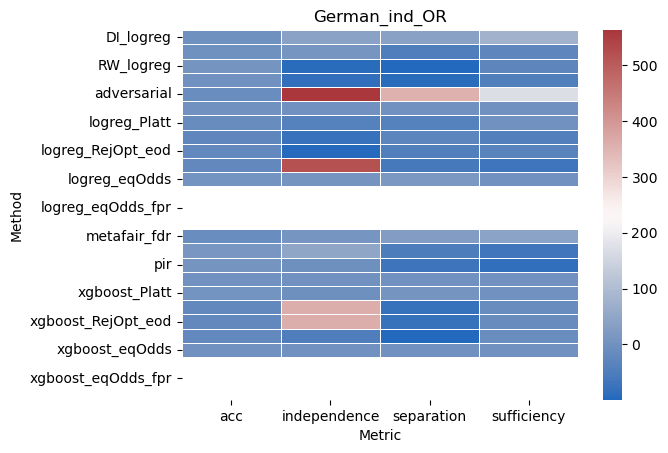

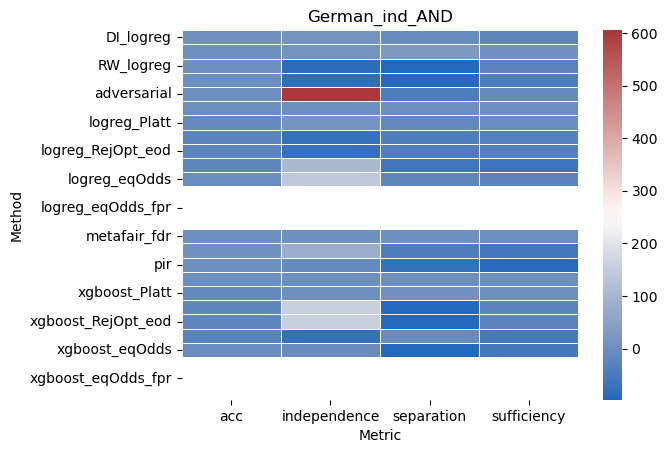

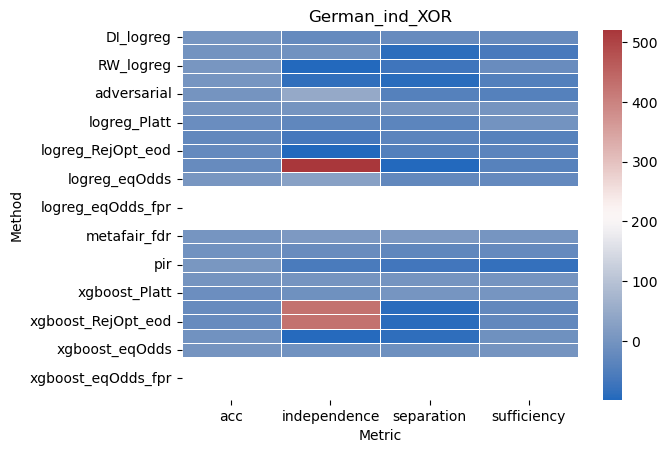

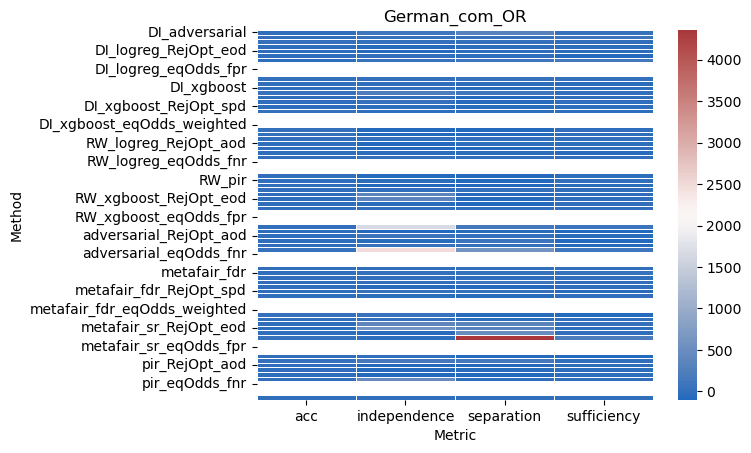

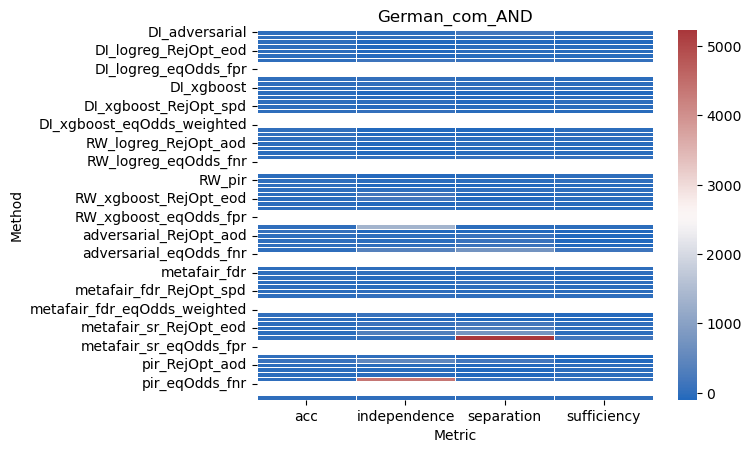

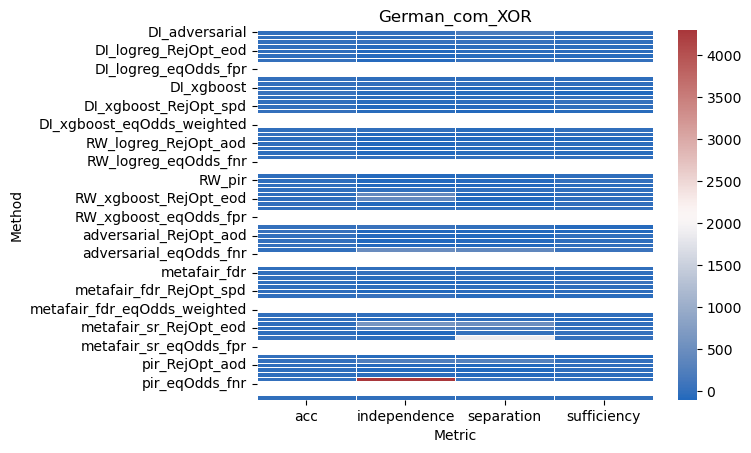

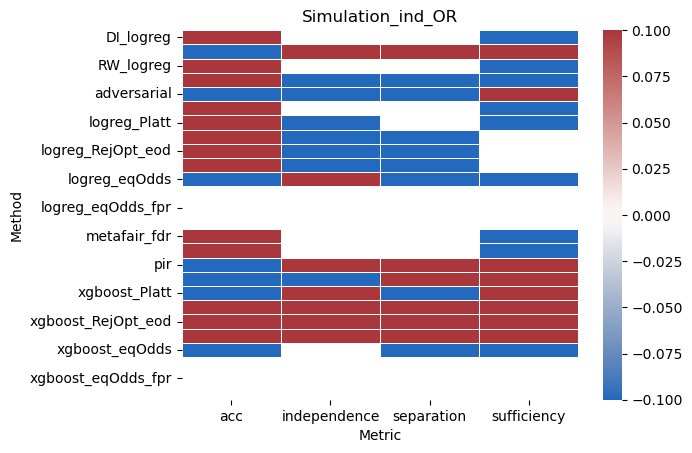

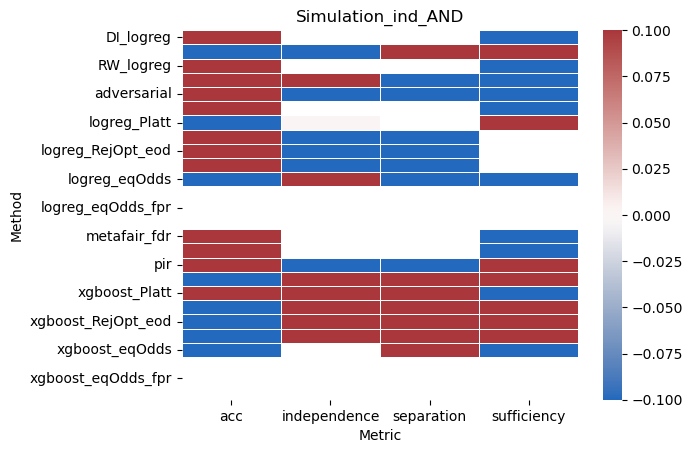

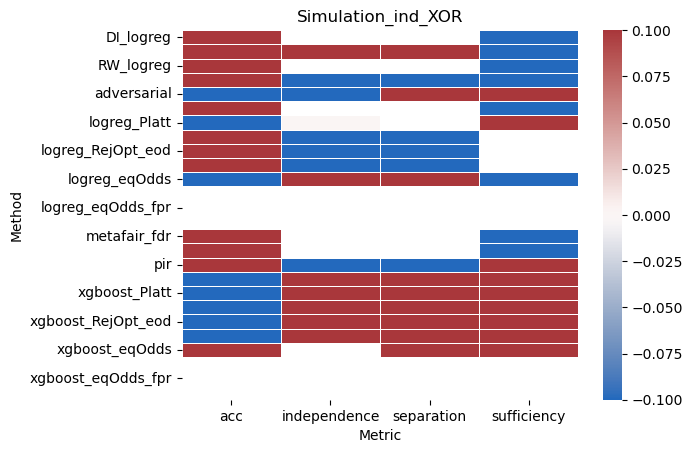

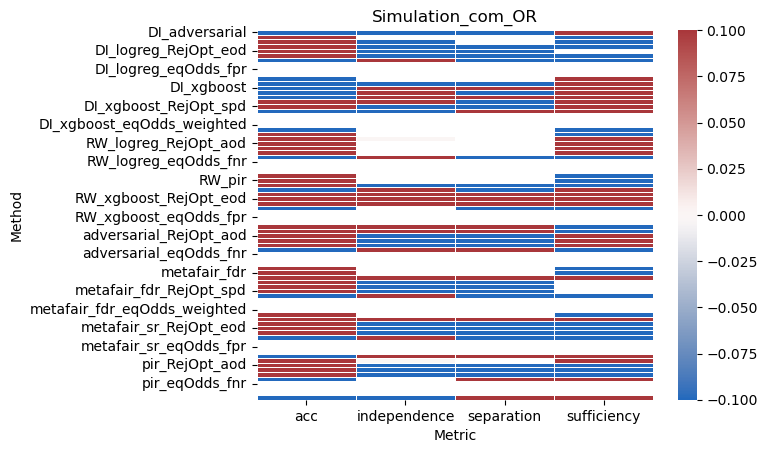

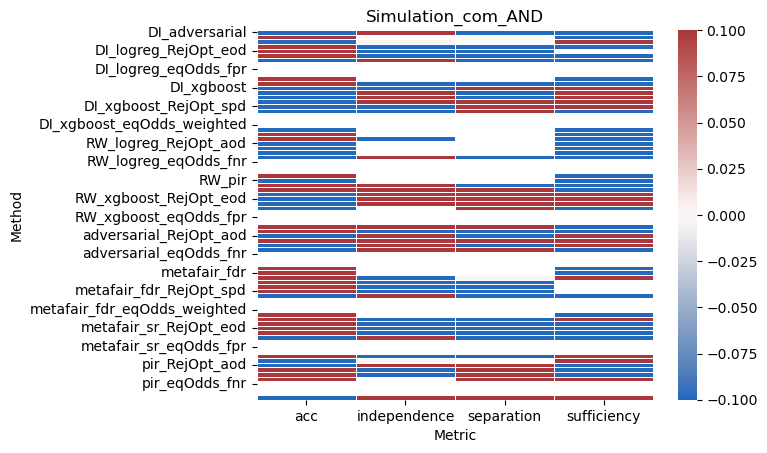

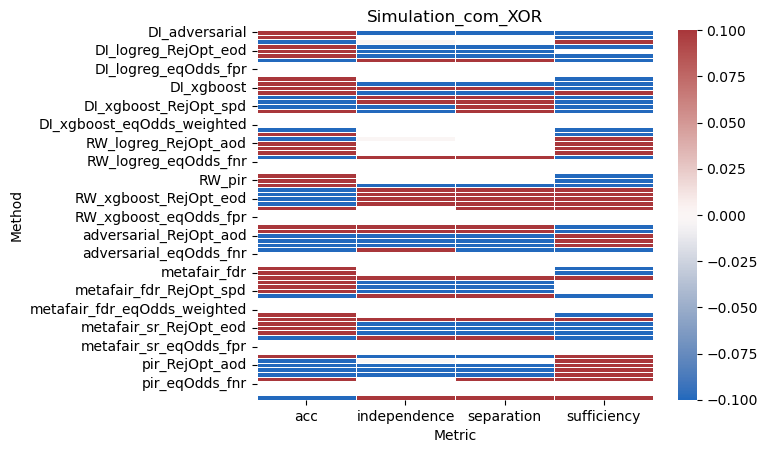

In [54]:
metrics = ['acc', 'independence', 'separation', 'sufficiency']

for name in datasets:
    for case in tables_pairs[name].keys():
        for operation in tables_pairs[name][case].keys():
            ax = sns.heatmap(tables_pairs[name][case][operation].loc[:, metrics], linewidth=0.5, cmap = "vlag")
            ax.set_xlabel('Metric')
            ax.set_ylabel('Method')
            ax.set_title(name + '_' + case + '_' +  operation)
            plt.show()

In [13]:
def mix_results():
    total_dict = dict()
    for dataset in sweepsDict.keys():
        total_dict[dataset] = dict()
        for case in sweepsDict[dataset].keys():
            for method in sweepsDict[dataset][case]:
                try:
                    total_dict[dataset]['separation'] += sweepsDict[dataset][case][method]['separation']
                    total_dict[dataset]['independence'] += sweepsDict[dataset][case][method]['independence']
                    total_dict[dataset]['sufficiency'] += sweepsDict[dataset][case][method]['sufficiency']
                    total_dict[dataset]['acc'] += sweepsDict[dataset][case][method]['acc']
                except:
                    total_dict[dataset]['separation'] = sweepsDict[dataset][case][method]['separation']
                    total_dict[dataset]['independence'] = sweepsDict[dataset][case][method]['independence']
                    total_dict[dataset]['sufficiency'] = sweepsDict[dataset][case][method]['sufficiency']
                    total_dict[dataset]['acc'] = sweepsDict[dataset][case][method]['acc']


    concrete_result = dict()
    for dataset in sweepsDict.keys():
        concrete_result[dataset] = dict()
        for case in sweepsDict[dataset].keys():
            concrete_result[dataset][case] = dict()
            for method in sweepsDict[dataset][case]:
                try:
                    concrete_result[dataset][case]['separation'] += sweepsDict[dataset][case][method]['separation']
                    concrete_result[dataset][case]['independence'] += sweepsDict[dataset][case][method]['independence']
                    concrete_result[dataset][case]['sufficiency'] += sweepsDict[dataset][case][method]['sufficiency']
                    concrete_result[dataset][case]['acc'] += sweepsDict[dataset][case][method]['acc']
                except:
                    concrete_result[dataset][case]['separation'] = sweepsDict[dataset][case][method]['separation']
                    concrete_result[dataset][case]['independence'] = sweepsDict[dataset][case][method]['independence']
                    concrete_result[dataset][case]['sufficiency'] = sweepsDict[dataset][case][method]['sufficiency']
                    concrete_result[dataset][case]['acc'] = sweepsDict[dataset][case][method]['acc']

    return total_dict, concrete_result

def mix_results_2():
    total_dict = dict()
    for dataset in resultsDict.keys():
        total_dict[dataset] = dict()
        for case in resultsDict[dataset].keys():
            for method in resultsDict[dataset][case].index:
                for metric in resultsDict[dataset][case].columns:
                    try:
                        total_dict[dataset][metric] += [resultsDict[dataset][case].loc[method, metric]]
                    except:
                        total_dict[dataset][metric] = [resultsDict[dataset][case].loc[method, metric]]


    concrete_result = dict()
    for dataset in resultsDict.keys():
        concrete_result[dataset] = dict()
        for case in resultsDict[dataset].keys():
            concrete_result[dataset][case] = dict()
            for method in resultsDict[dataset][case].index:
                for metric in resultsDict[dataset][case].columns:
                    try:
                        concrete_result[dataset][case][metric] += [resultsDict[dataset][case].loc[method, metric]]
                    except:
                        concrete_result[dataset][case][metric] = [resultsDict[dataset][case].loc[method, metric]]

    return total_dict, concrete_result


def plot_pareto(sweeps, metric1_name, metric2_name):

    metric1 = sweeps[metric1_name]
    metric2 = sweeps[metric2_name]

    metric1_np = np.copy(np.array(metric1))
    metric2_np = np.copy(np.array(metric2))
    
    frontier = np.zeros(np.shape(metric1_np)) 

    for value in metric1:
        index = np.where(metric1_np == value)
        minim = np.max(metric2_np[index])
        frontier[index] = minim 

    sorted_frontier = np.array([x for _,x in sorted(zip(metric1, frontier))])
    cum_sorted_frontier = np.minimum.accumulate(sorted_frontier)
    
    fig, ax = plt.subplots()
    ax.set_title('Trade offs')
    ax.set_xlabel(metric1_name)
    ax.set_ylabel(metric2_name)
    ax.step(np.sort(metric1_np), cum_sorted_frontier)
    return fig, ax

total_dict, concrete_result = mix_results_2()

In [14]:
column = 'logreg'
resultsDict['German']['German1V_com_1'].index

Index(['logreg', 'xgboost', 'RW_logreg', 'DI_logreg', 'RW_xgboost',
       'DI_xgboost', 'RW_adversarial', 'DI_adversarial', 'RW_metafair',
       'DI_metafair', 'RW_pir', 'DI_pir', 'metafair_sr', 'metafair_fdr', 'pir',
       'adversarial', 'RW_logreg_Platt', 'RW_logreg_eqOdds',
       'RW_logreg_eqOdds_weighted', 'RW_logreg_eqOdds_fnr',
       'RW_logreg_eqOdds_fpr', 'RW_logreg_RejOpt_spd', 'RW_logreg_RejOpt_aod',
       'RW_logreg_RejOpt_eod', 'RW_xgboost_Platt', 'RW_xgboost_eqOdds',
       'RW_xgboost_eqOdds_weighted', 'RW_xgboost_eqOdds_fnr',
       'RW_xgboost_eqOdds_fpr', 'RW_xgboost_RejOpt_spd',
       'RW_xgboost_RejOpt_aod', 'RW_xgboost_RejOpt_eod', 'DI_logreg_Platt',
       'DI_logreg_eqOdds', 'DI_logreg_eqOdds_weighted', 'DI_logreg_eqOdds_fnr',
       'DI_logreg_eqOdds_fpr', 'DI_logreg_RejOpt_spd', 'DI_logreg_RejOpt_aod',
       'DI_logreg_RejOpt_eod', 'DI_xgboost_Platt', 'DI_xgboost_eqOdds',
       'DI_xgboost_eqOdds_weighted', 'DI_xgboost_eqOdds_fnr',
       'DI_xgboost_e

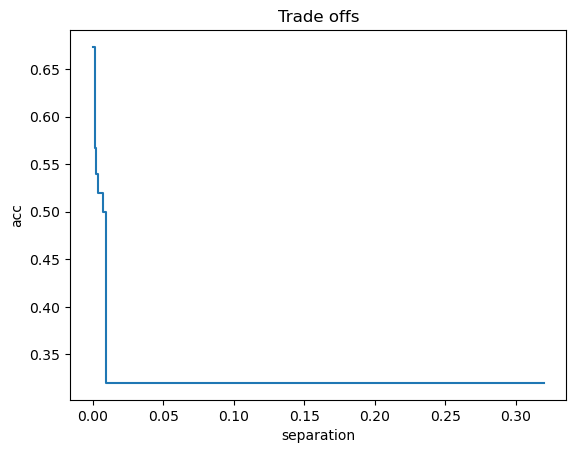

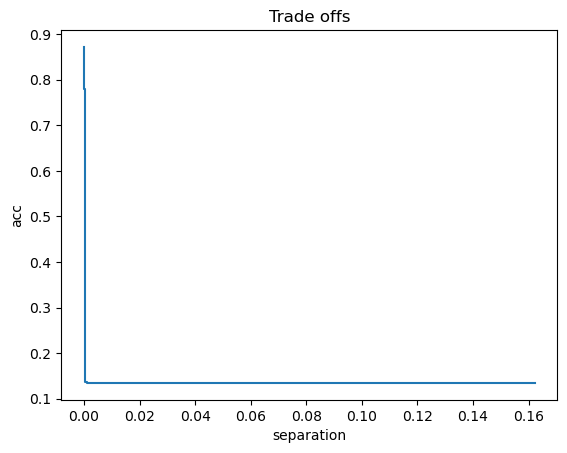

In [15]:
fig, ax = plot_pareto(total_dict['German'], 'separation', 'acc')
fig, ax = plot_pareto(total_dict['Simulation'], 'separation', 'acc')

In [16]:
concrete_result['German']['German1V_com_1']

{'best_threshold': [0.7979591836734694,
  0.676734693877551,
  0.7171428571428571,
  0.8181632653061224,
  0.7373469387755102,
  0.7373469387755102,
  0.39387755102040817,
  0.9797959183673469,
  0.6363265306122449,
  0.6363265306122449,
  0.7777551020408163,
  0.676734693877551,
  0.5757142857142857,
  0.6363265306122449,
  0.8181632653061224,
  0.6969387755102041,
  0.7873325239319494,
  0.7575510204081632,
  0.4342857142857143,
  0.4342857142857143,
  0.7979591836734694,
  0.7326262626262626,
  0.7425252525252525,
  0.7326262626262626,
  0.6922247537544796,
  0.676734693877551,
  0.676734693877551,
  0.676734693877551,
  0.676734693877551,
  0.4257575757575757,
  0.5841414141414141,
  0.5841414141414141,
  0.7961441808072129,
  0.6969387755102041,
  0.5959183673469388,
  0.676734693877551,
  0.7979591836734694,
  0.6831313131313131,
  0.702929292929293,
  0.7128282828282828,
  0.7995935410869365,
  0.8585714285714285,
  0.8989795918367347,
  0.6363265306122449,
  0.8585714285714285,

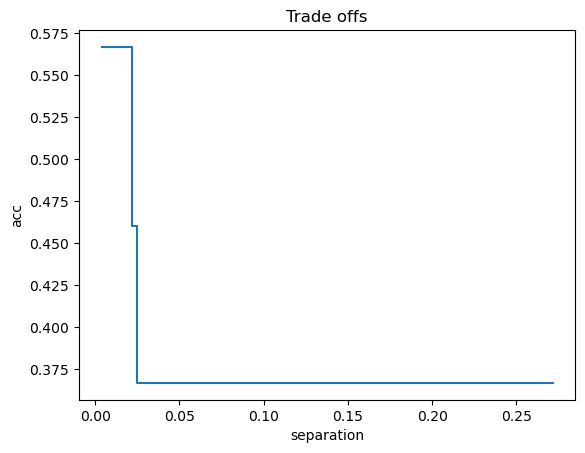

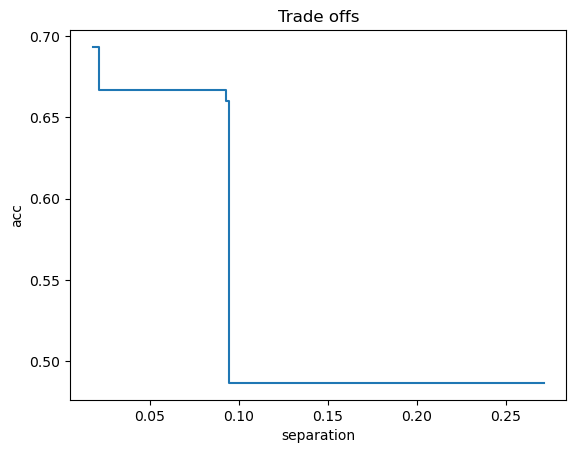

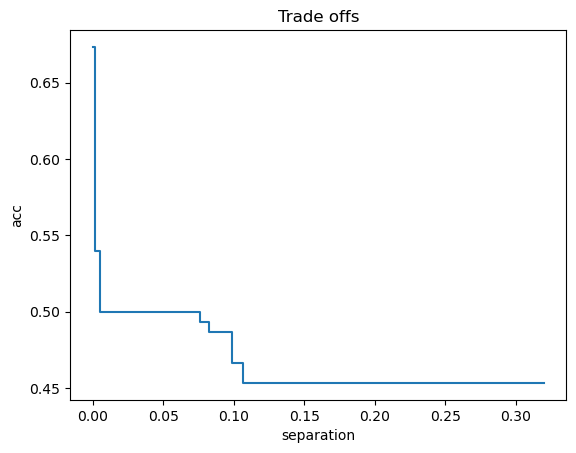

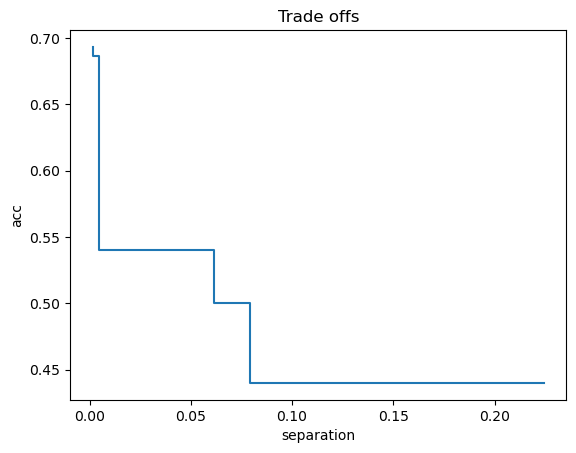

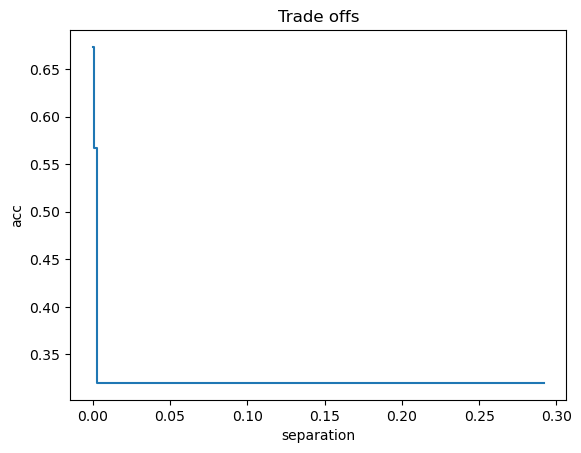

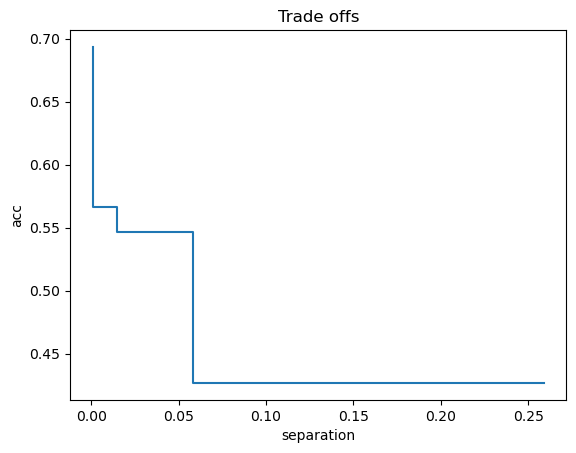

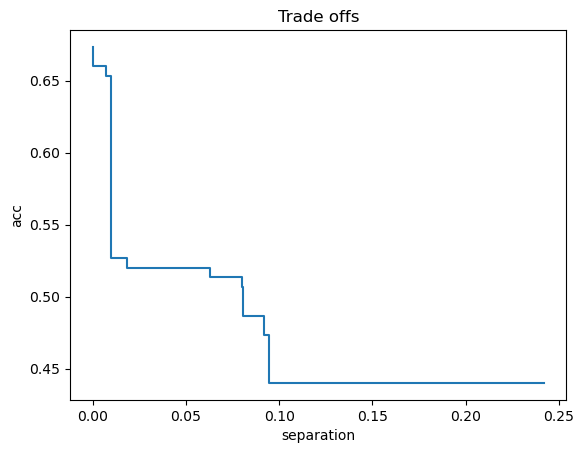

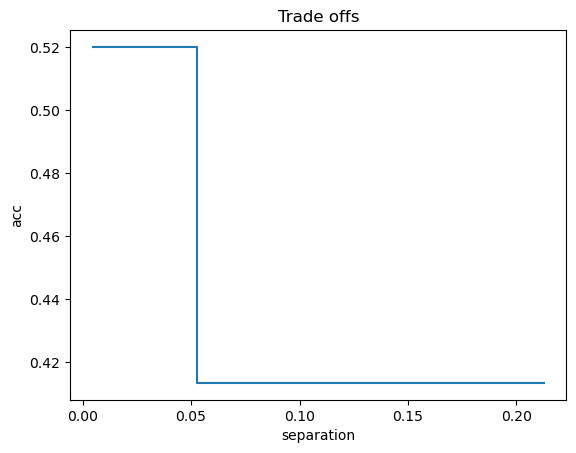

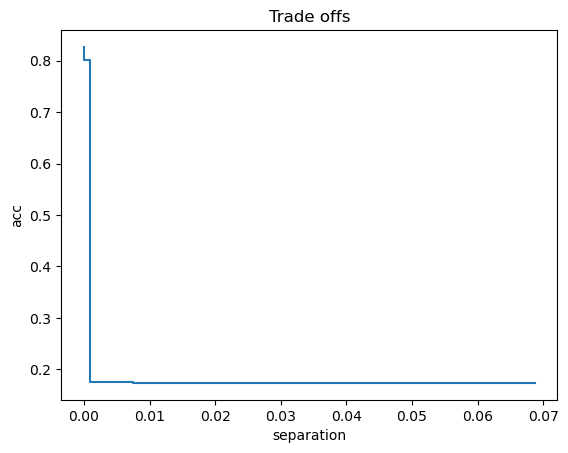

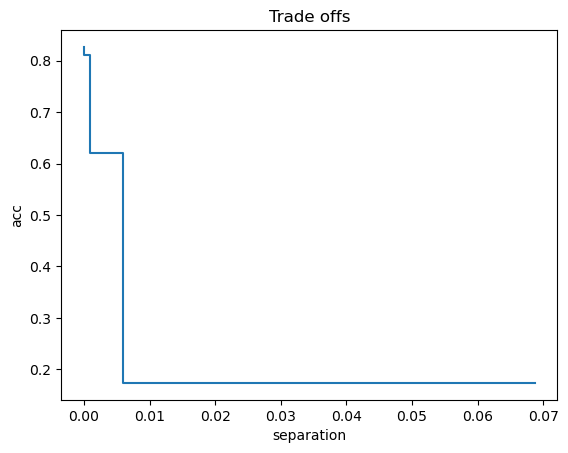

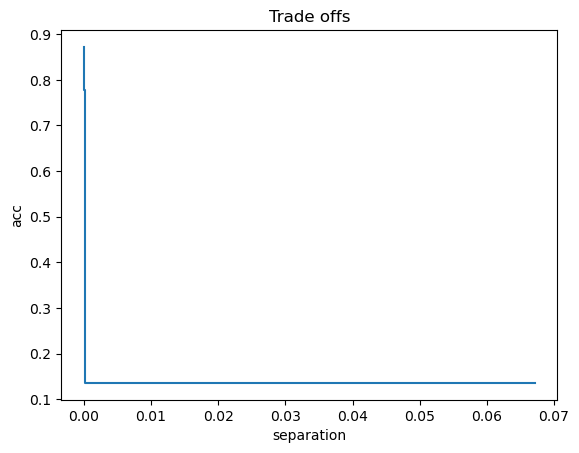

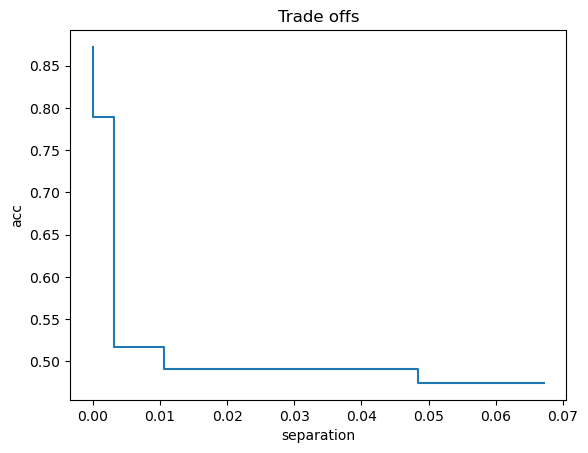

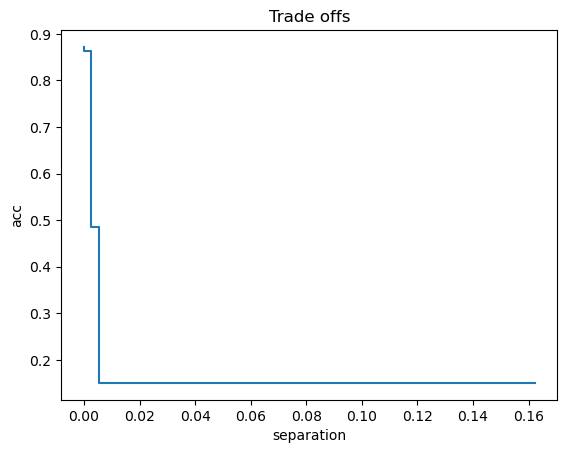

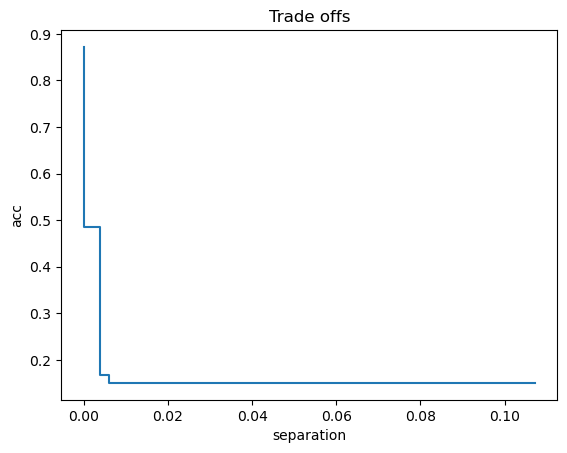

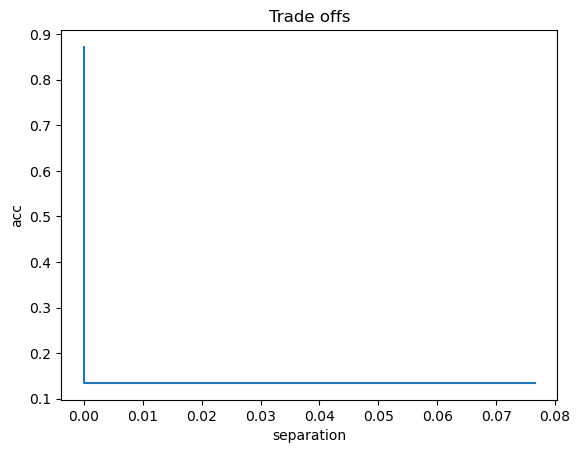

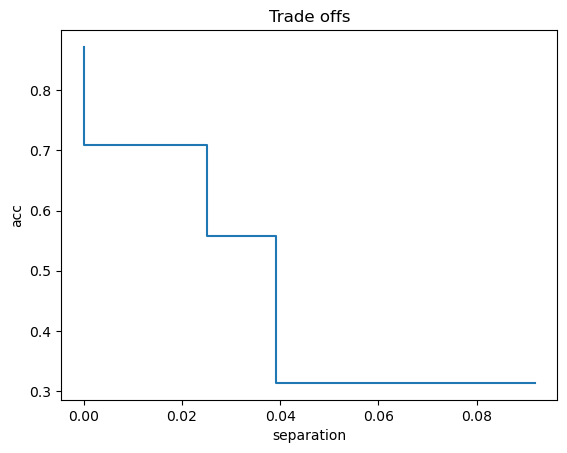

In [17]:
for dataset in datasets:
    for case in sweepsDict[dataset]:
        plot_pareto(concrete_result[dataset][case], 'separation', 'acc')

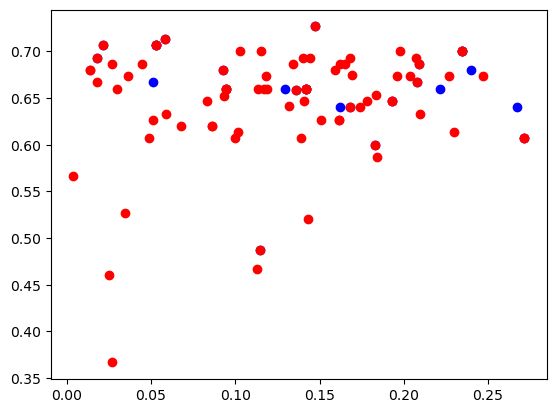

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [18]:
def plot_scatter(results1, results2, metric1, metric2):
    fig, ax = plt.subplots()
    ax.scatter(results1[metric1], results1[metric2], color = 'b')
    ax.scatter(results2[metric1], results2[metric2], color = 'r')
    plt.show()
    return fig, ax

plot_scatter(concrete_result['German']['German1V_ind_1'], concrete_result['German']['German1V_com_1'], 'separation', 'acc')

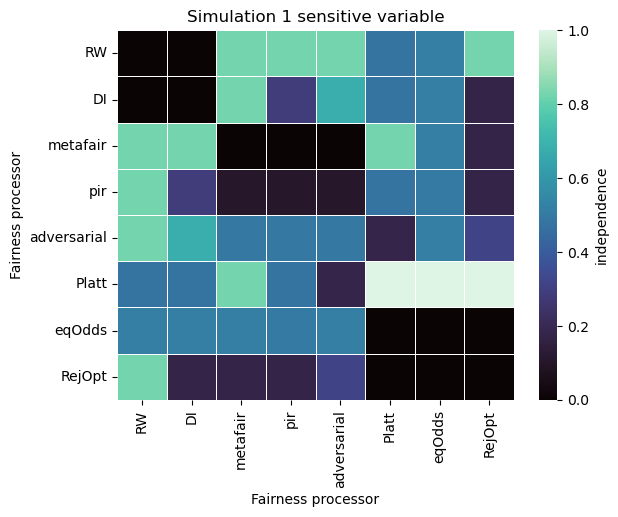

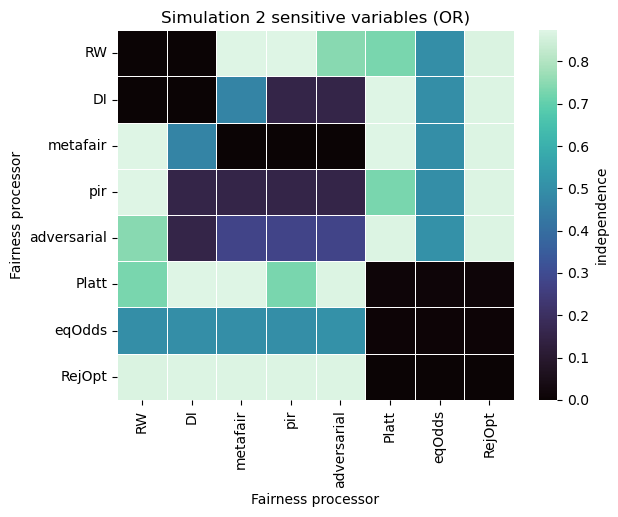

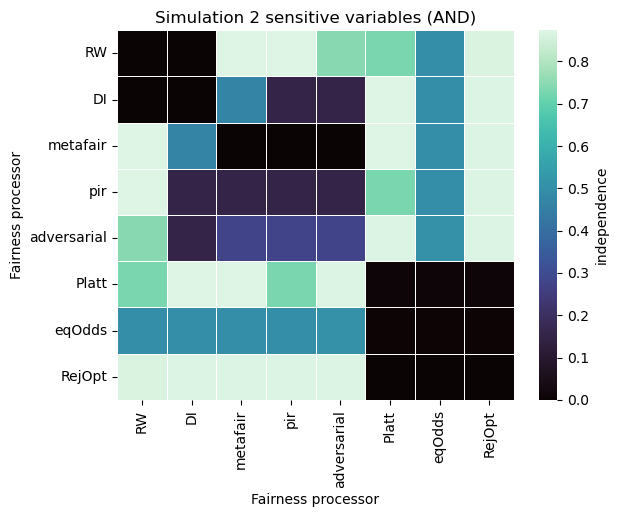

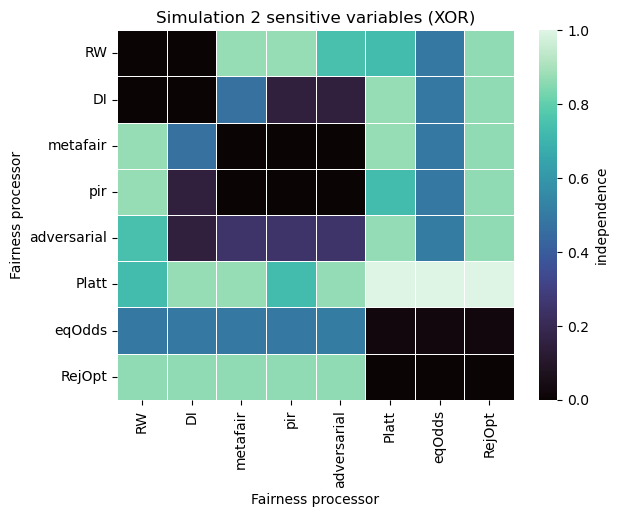

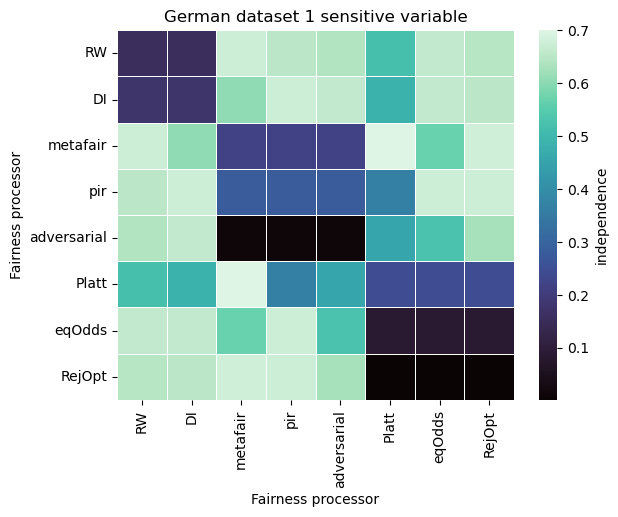

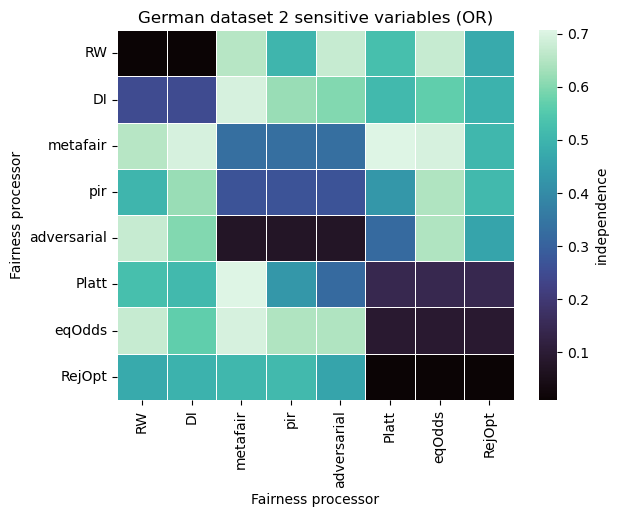

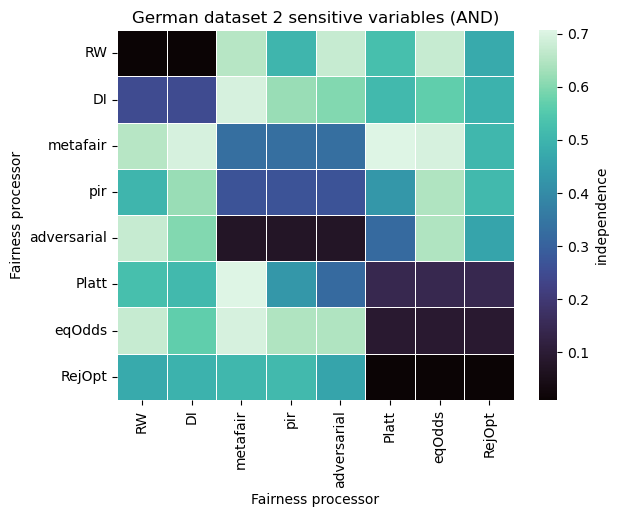

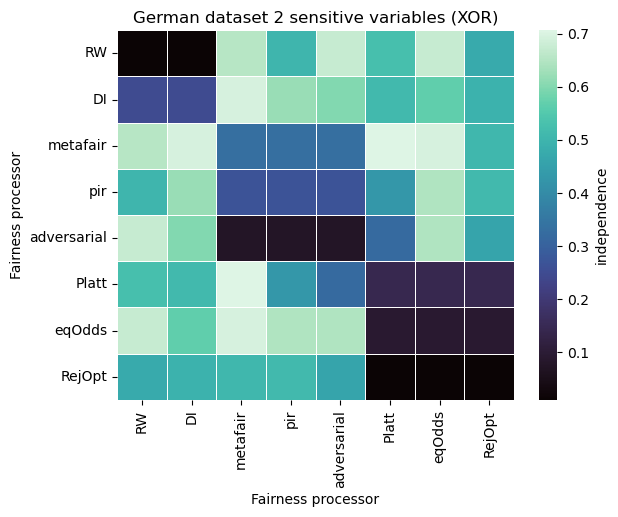

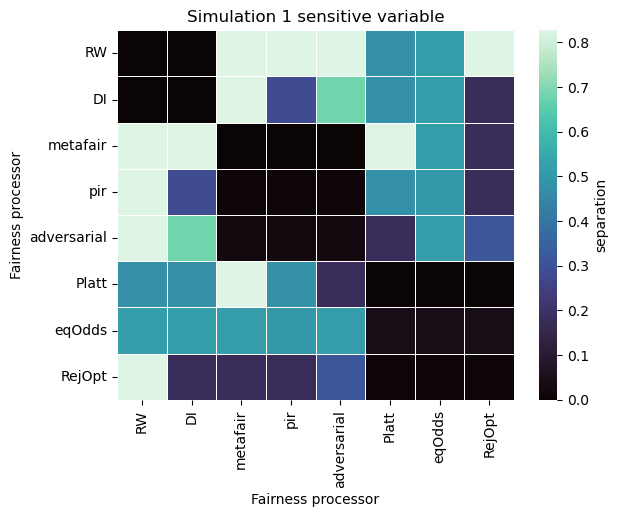

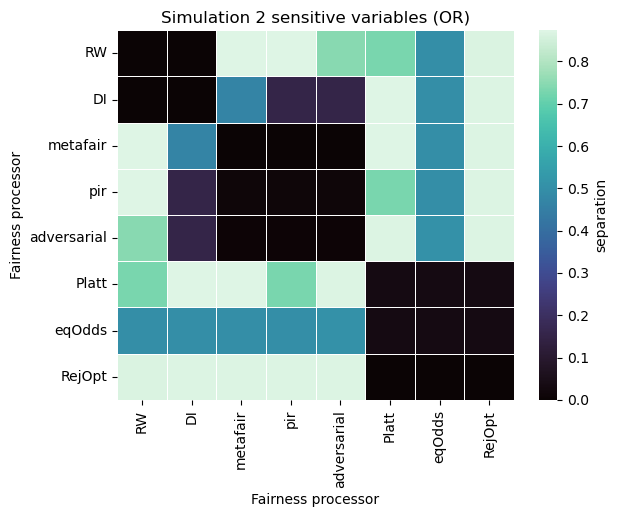

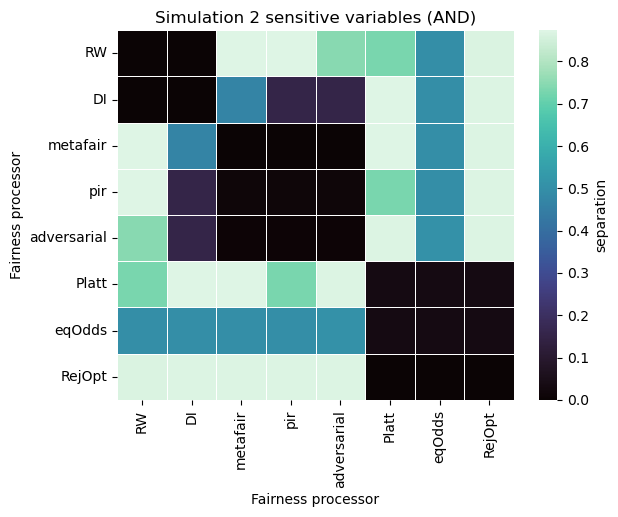

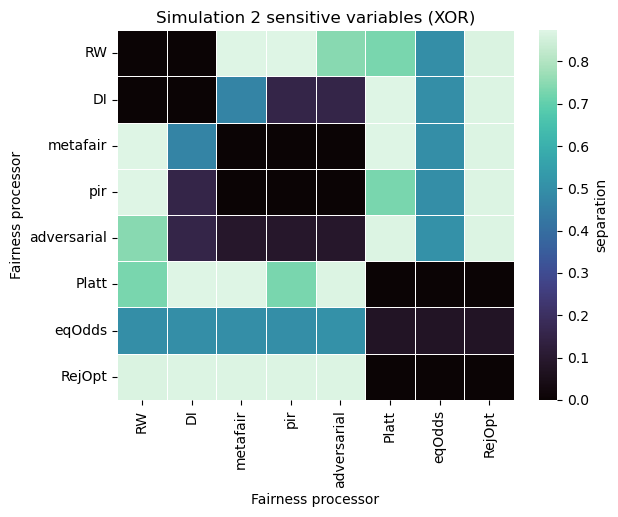

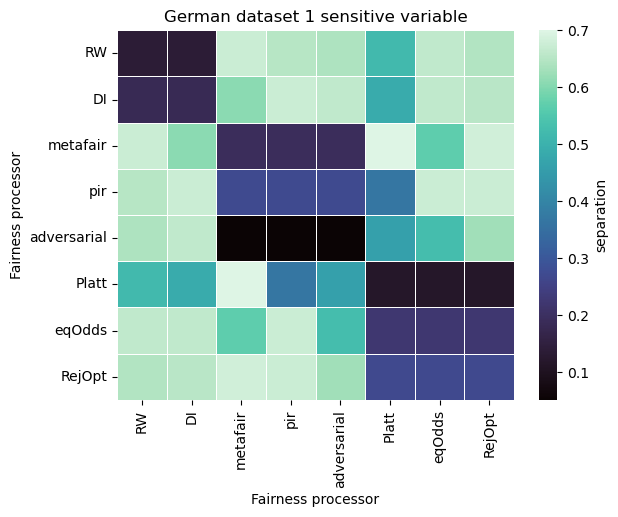

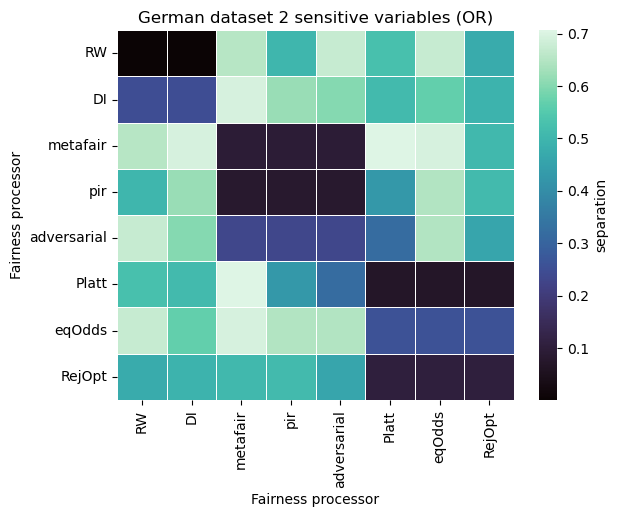

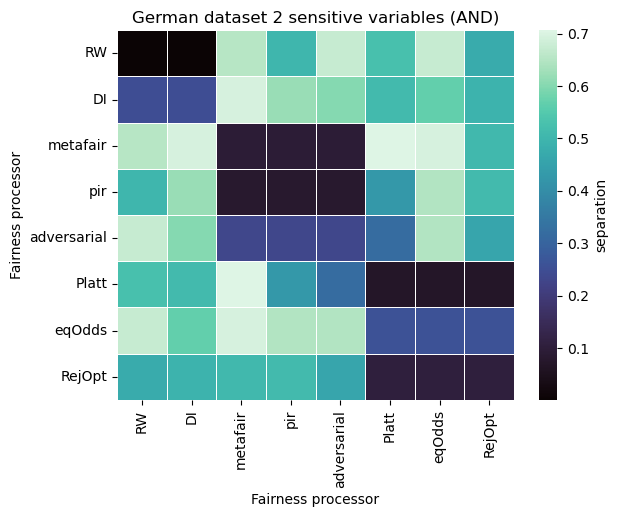

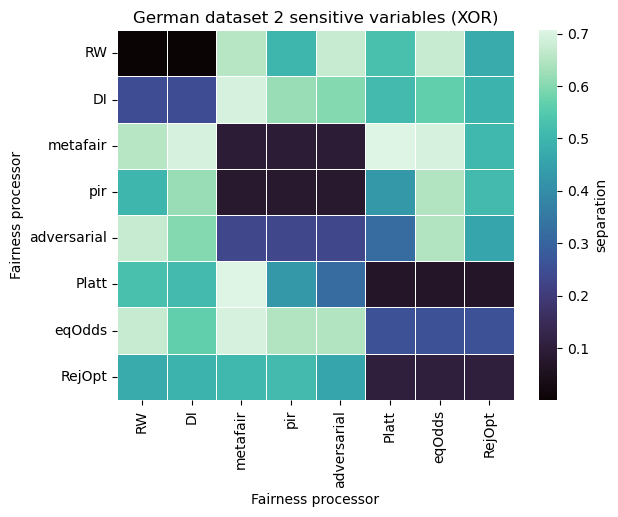

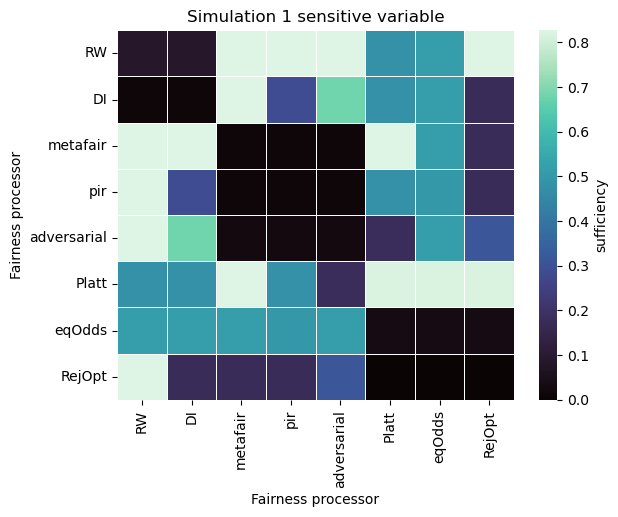

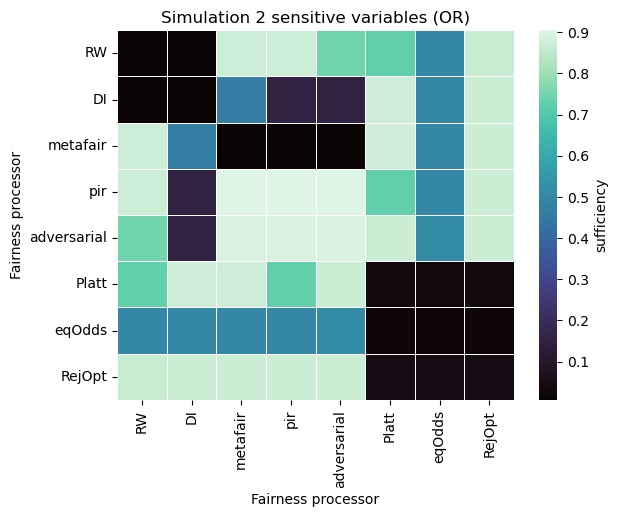

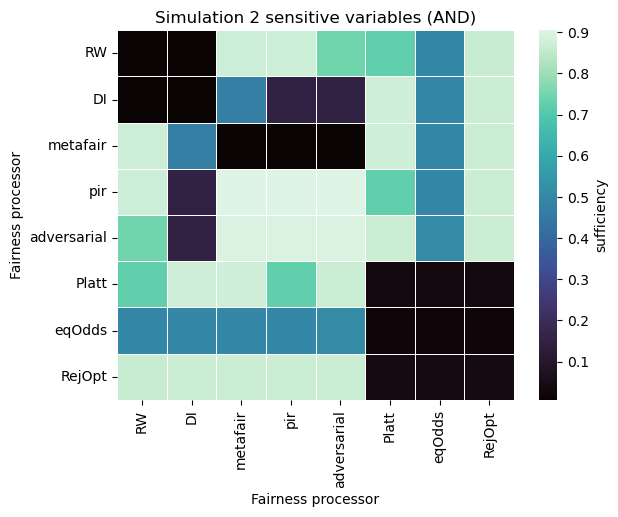

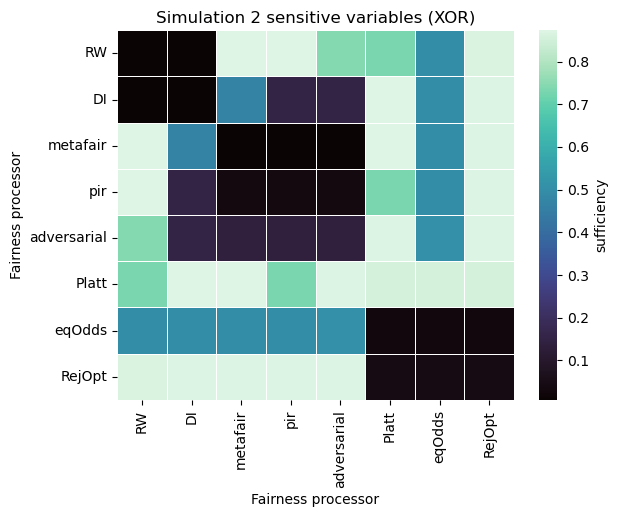

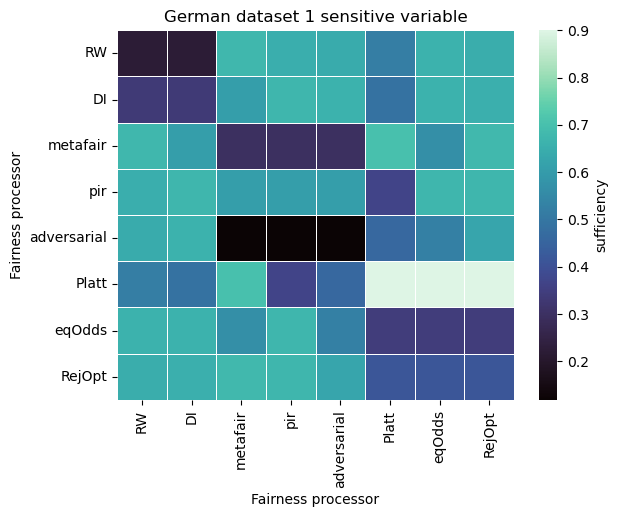

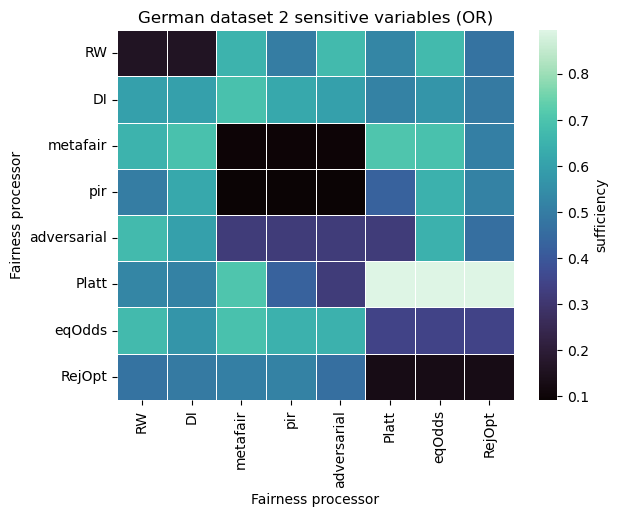

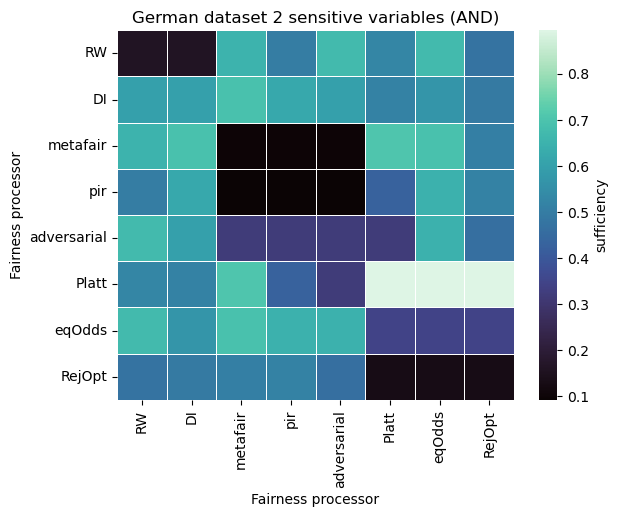

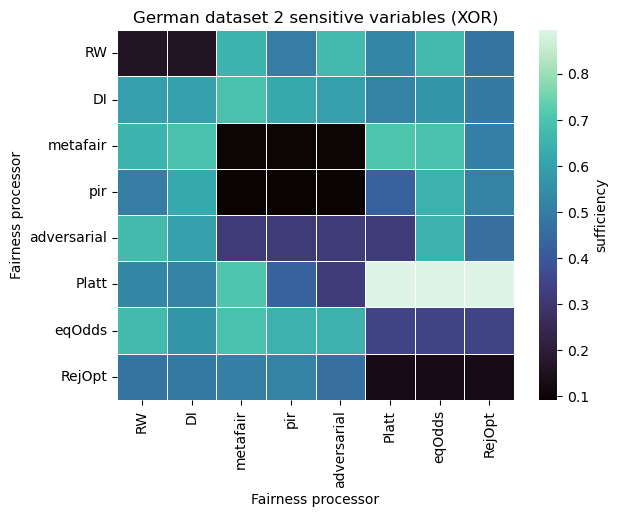

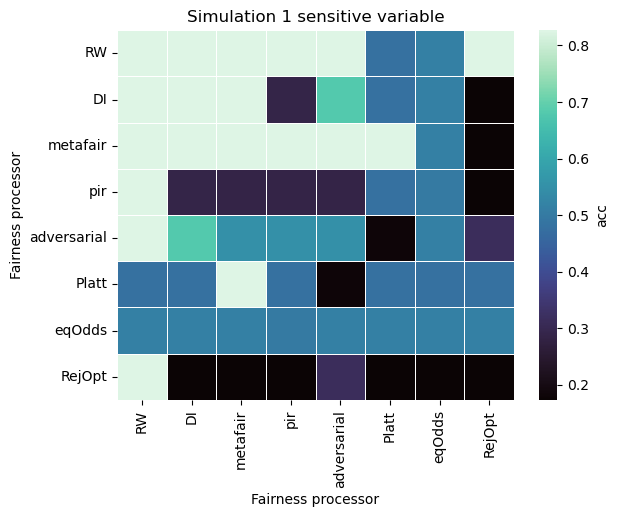

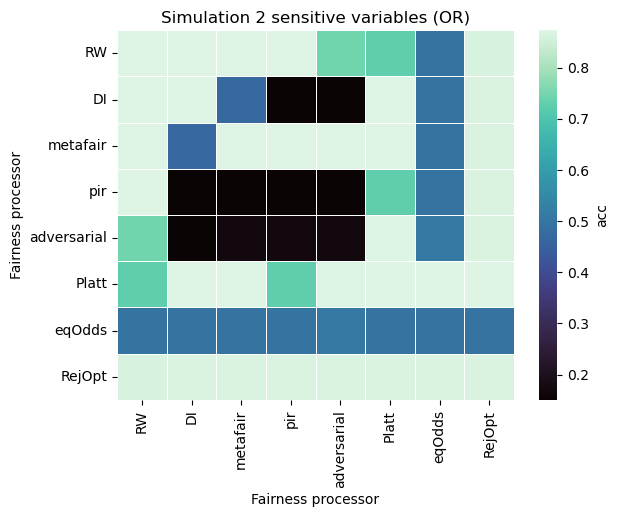

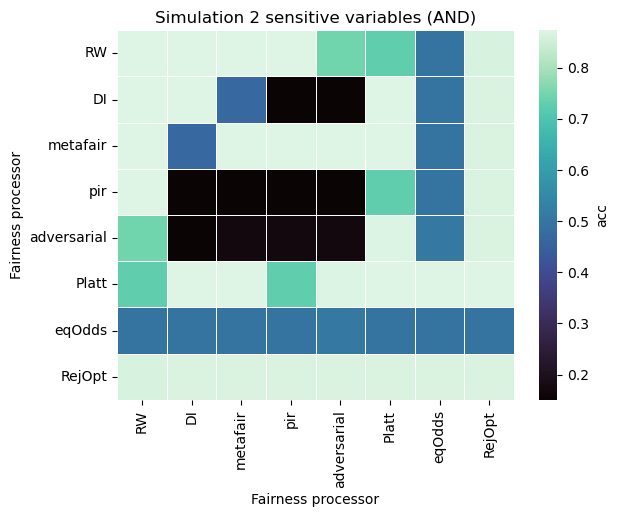

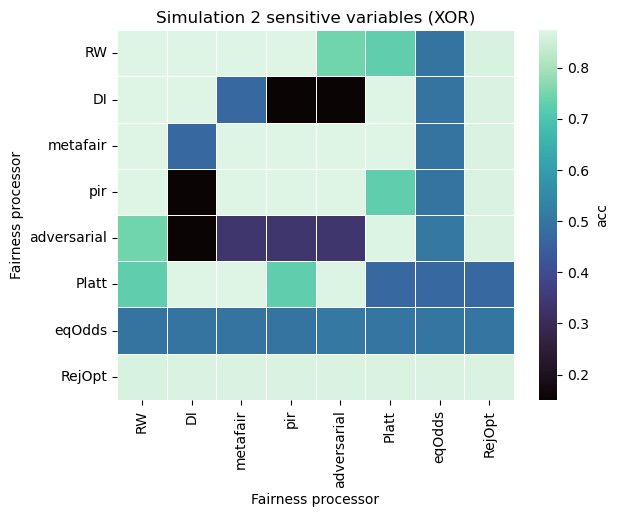

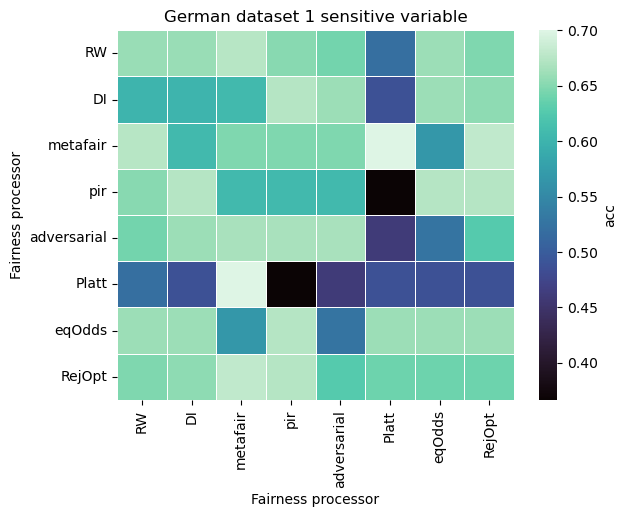

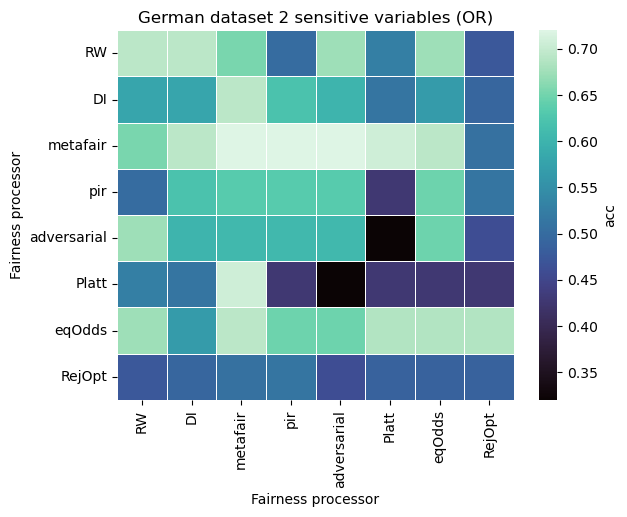

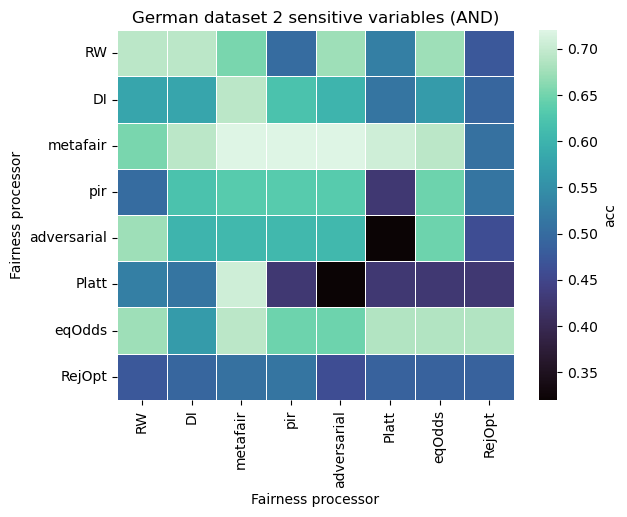

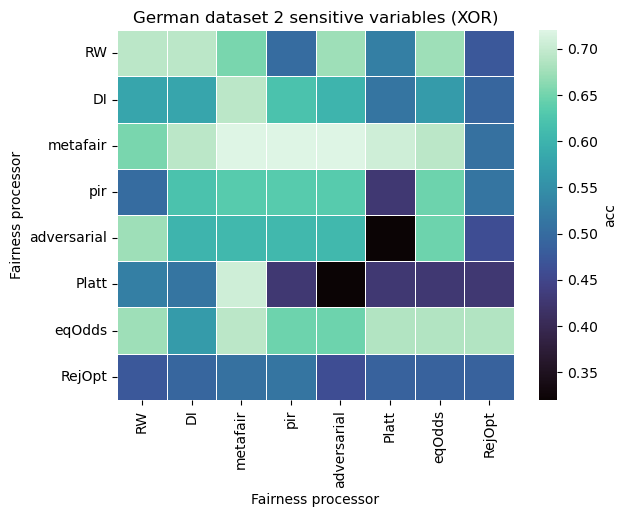

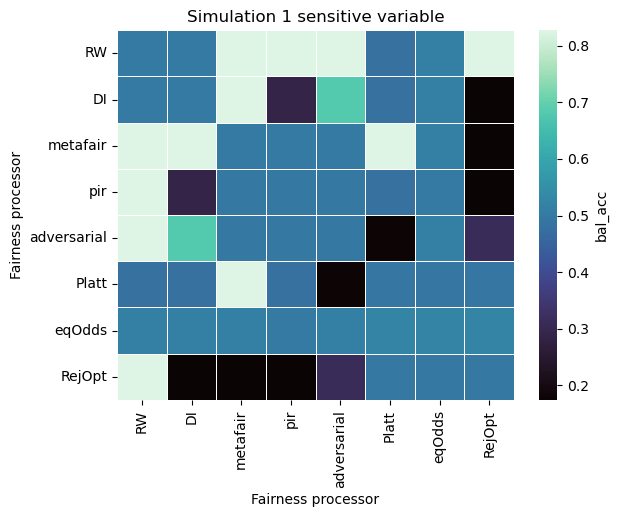

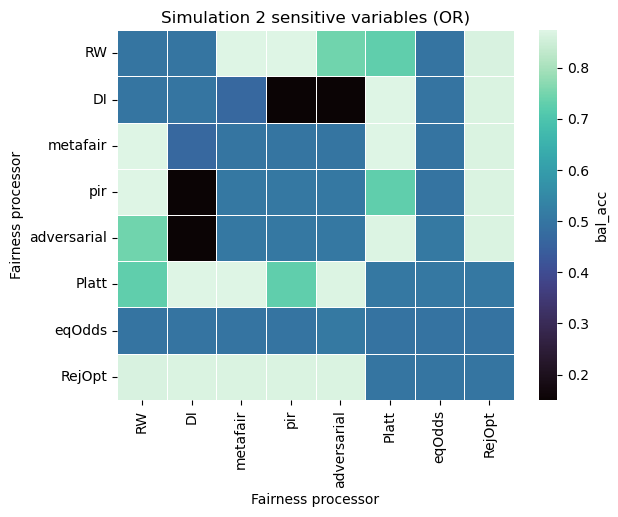

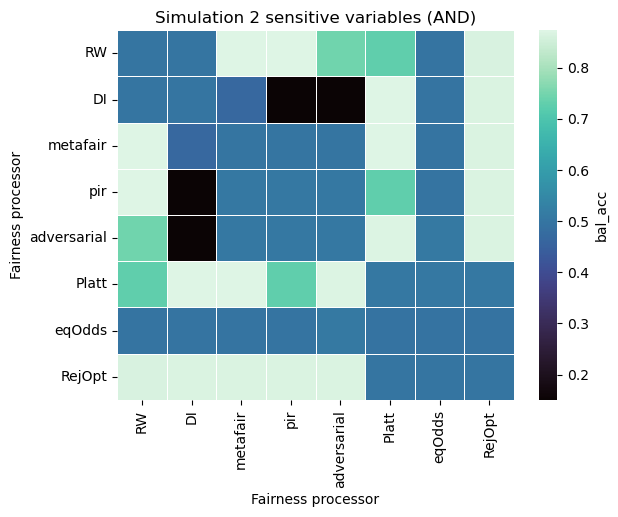

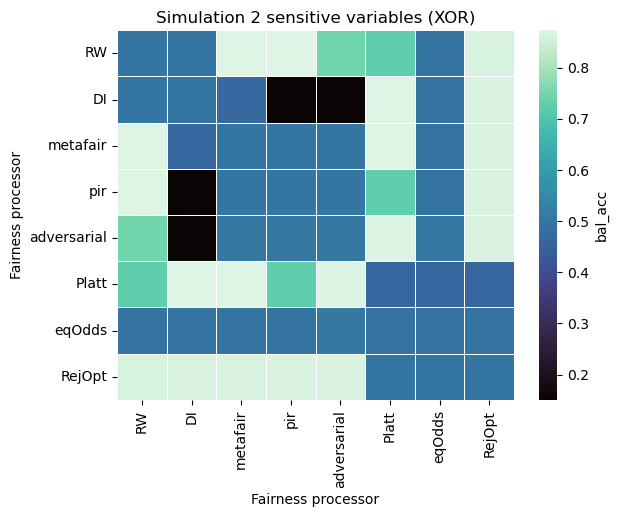

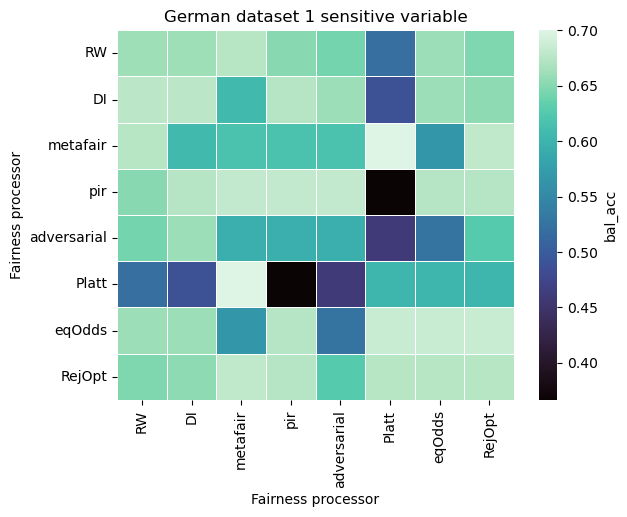

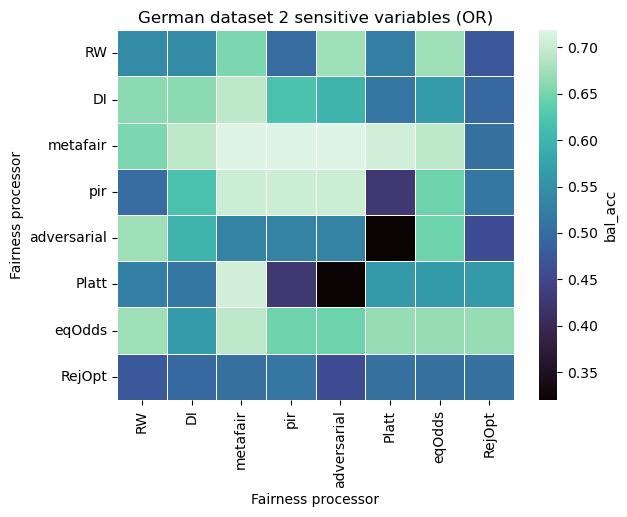

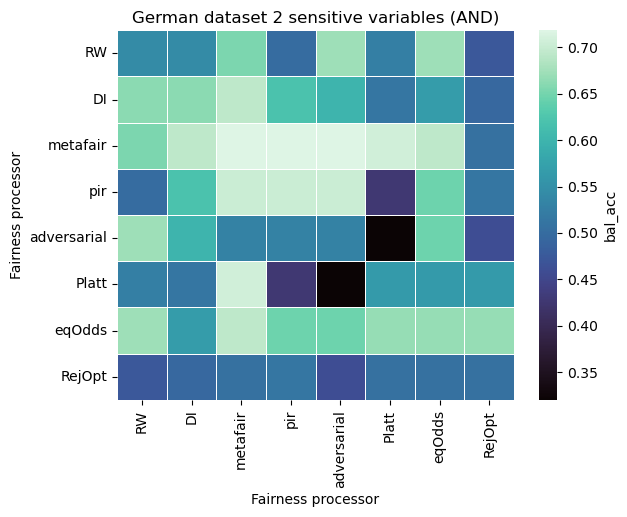

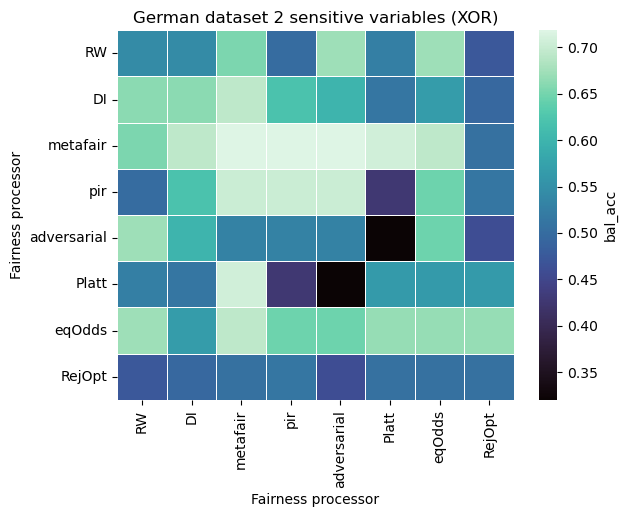

In [19]:
preproc = ['RW', 'DI']
inproc = ['metafair', 'pir', 'adversarial']
postproc = ['Platt', 'eqOdds', 'RejOpt']

proc = preproc + inproc + postproc

default_labels = {
    'RW': 'RW_logreg',
    'DI': 'DI_logreg',
    'adversarial': 'adversarial',
    'metafair': 'metafair_sr',
    'pir': 'pir',
    'Platt': 'Platt',
    'eqOdds': 'eqOdds',
    'RejOpt': 'RejOpt_spd'
    }


def combination_matrix(resultsInd, resultsCom):

    matrices = dict()
    metrics = ['acc', 'bal_acc', 'independence', 'separation', 'sufficiency']
    for metric in metrics:
        matrices[metric] = pd.DataFrame(np.nan, index=proc, columns=proc)

    for index1 in proc:
        for index2 in proc:
            if \
                (index1 in preproc and index2 in preproc) or \
                (index1 in inproc and index2 in inproc) or \
                (index1 in postproc and index2 in postproc):

                if index1 in postproc:
                    nameUse = 'logreg_' + default_labels[index1]
                else:
                    nameUse = default_labels[index1]

                for metric in metrics:
                    matrices[metric].loc[index1, index2] = resultsInd.loc[nameUse, metric]

            else:
                if np.isnan(matrices['acc'].loc[index1, index2]):
                    if (index1 in preproc and index2 in inproc):
                        method_name = index1 + '_' + index2
                    else:
                        method_name = default_labels[index1] + '_' + default_labels[index2]                    
                    
                    for metric in metrics:
                        matrices[metric].loc[index1, index2] = resultsCom.loc[method_name, 'acc']
                        matrices[metric].loc[index2, index1] = resultsCom.loc[method_name, 'acc']
                    
    return matrices


def plot_heat_combination_matrix(resultsInd, resultsCom, metric, title = ""):
    
    matrices = combination_matrix(resultsInd, resultsCom)
    matrix_metric = matrices[metric]

    fig, ax = plt.subplots()
    cmap = "mako"
    sns.heatmap(matrix_metric, linewidth=0.5, ax = ax, cmap = cmap)
    ax.set_xlabel("Fairness processor")
    ax.set_ylabel("Fairness processor")
    ax.collections[0].colorbar.set_label(metric)
    return fig, ax

metrics = ['independence', 'separation', 'sufficiency', 'acc', 'bal_acc']

for metric in metrics:
    
    fig, ax = plot_heat_combination_matrix(resultsDict['Simulation']['Simulation1V_ind_1'], resultsDict['Simulation']['Simulation1V_com_1'], metric)
    ax.set_title("Simulation 1 sensitive variable")
    plt.show()

    fig, ax = plot_heat_combination_matrix(resultsDict['Simulation']['Simulation2V_OR_ind_1'], resultsDict['Simulation']['Simulation2V_OR_com_1'], metric)
    ax.set_title("Simulation 2 sensitive variables (OR)")
    plt.show()

    fig, ax = plot_heat_combination_matrix(resultsDict['Simulation']['Simulation2V_OR_ind_1'], resultsDict['Simulation']['Simulation2V_OR_com_1'], metric)
    ax.set_title("Simulation 2 sensitive variables (AND)")
    plt.show()

    fig, ax = plot_heat_combination_matrix(resultsDict['Simulation']['Simulation2V_XOR_ind_1'], resultsDict['Simulation']['Simulation2V_OR_com_1'], metric)
    ax.set_title("Simulation 2 sensitive variables (XOR)")
    plt.show()

    fig, ax = plot_heat_combination_matrix(resultsDict['German']['German1V_ind_1'], resultsDict['German']['German1V_com_1'], metric)
    ax.set_title("German dataset 1 sensitive variable")
    plt.show()

    fig, ax = plot_heat_combination_matrix(resultsDict['German']['German2V_OR_ind_1'], resultsDict['German']['German2V_OR_com_1'], metric)
    ax.set_title("German dataset 2 sensitive variables (OR)")
    plt.show()

    fig, ax = plot_heat_combination_matrix(resultsDict['German']['German2V_OR_ind_1'], resultsDict['German']['German2V_OR_com_1'], metric)
    ax.set_title("German dataset 2 sensitive variables (AND)")
    plt.show()

    fig, ax = plot_heat_combination_matrix(resultsDict['German']['German2V_OR_ind_1'], resultsDict['German']['German2V_OR_com_1'], metric)
    ax.set_title("German dataset 2 sensitive variables (XOR)")
    plt.show()


C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values[method1] = resultsInd.loc[default_labels[method1]].tolist() + [resultsInd.loc[default_labels[method1]][0]]
C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values[method2] = resultsInd.loc[default_labels[method2]].tolist() + [resultsInd.loc[default_labels[method2]][0]]
C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, 

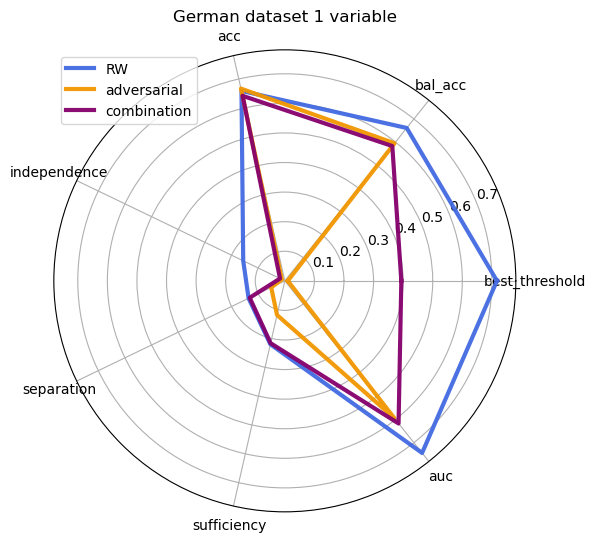

C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values[method1] = resultsInd.loc[default_labels[method1]].tolist() + [resultsInd.loc[default_labels[method1]][0]]
C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values[method2] = resultsInd.loc[default_labels[method2]].tolist() + [resultsInd.loc[default_labels[method2]][0]]
C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, 

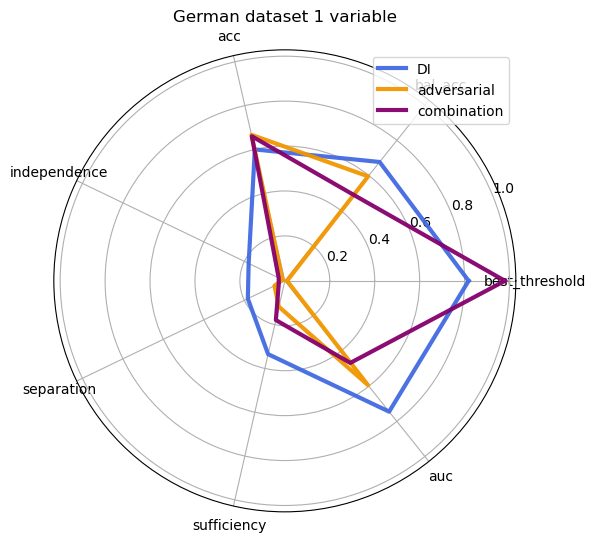

C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values[method1] = resultsInd.loc[default_labels[method1]].tolist() + [resultsInd.loc[default_labels[method1]][0]]
C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values[method2] = resultsInd.loc[default_labels[method2]].tolist() + [resultsInd.loc[default_labels[method2]][0]]
C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, 

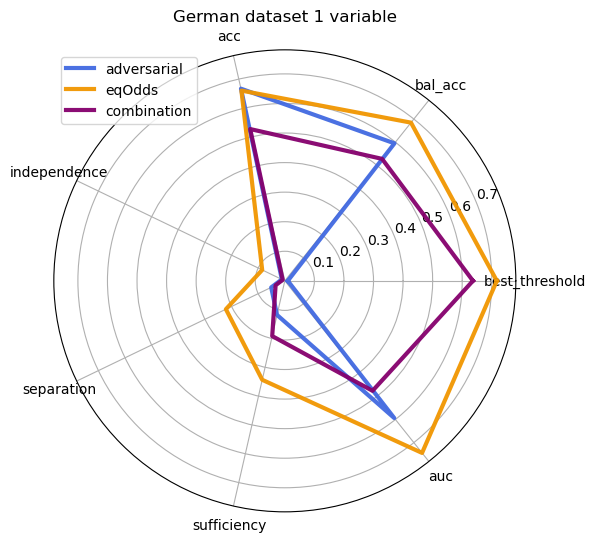

C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values[method1] = resultsInd.loc[default_labels[method1]].tolist() + [resultsInd.loc[default_labels[method1]][0]]
C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values[method2] = resultsInd.loc[default_labels[method2]].tolist() + [resultsInd.loc[default_labels[method2]][0]]
C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, 

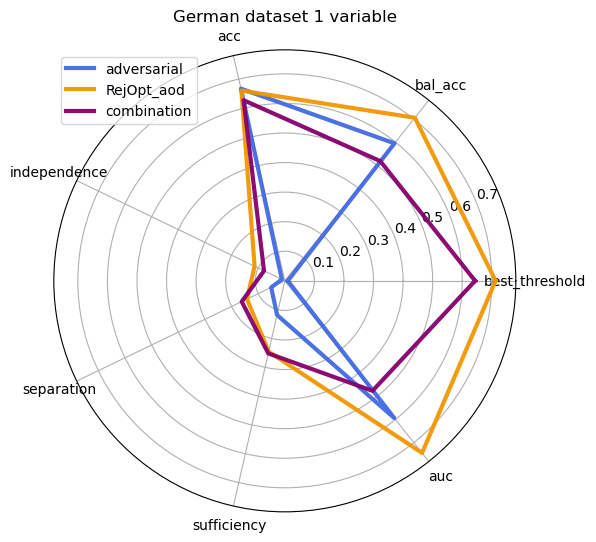

C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values[method1] = resultsInd.loc[default_labels[method1]].tolist() + [resultsInd.loc[default_labels[method1]][0]]
C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values[method2] = resultsInd.loc[default_labels[method2]].tolist() + [resultsInd.loc[default_labels[method2]][0]]
C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, 

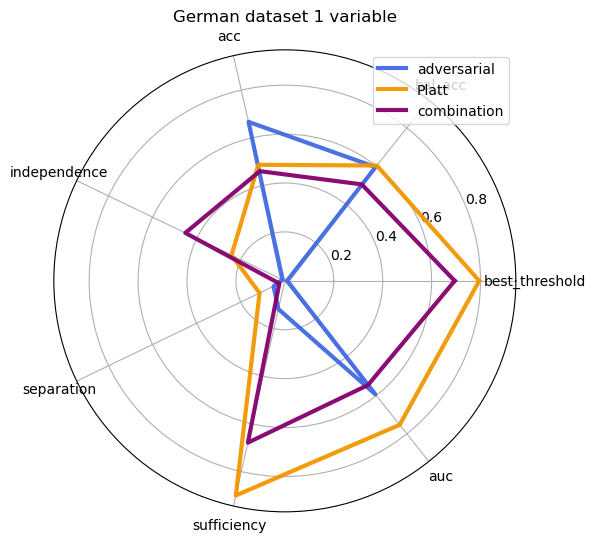

C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values[method1] = resultsInd.loc[default_labels[method1]].tolist() + [resultsInd.loc[default_labels[method1]][0]]
C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values[method2] = resultsInd.loc[default_labels[method2]].tolist() + [resultsInd.loc[default_labels[method2]][0]]
C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, 

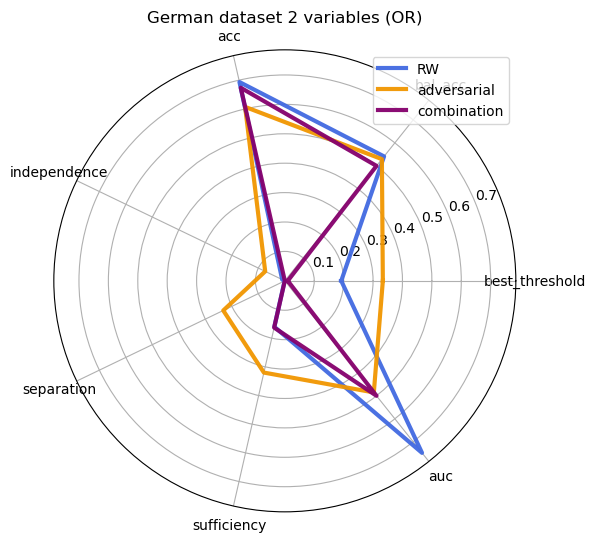

C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values[method1] = resultsInd.loc[default_labels[method1]].tolist() + [resultsInd.loc[default_labels[method1]][0]]
C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values[method2] = resultsInd.loc[default_labels[method2]].tolist() + [resultsInd.loc[default_labels[method2]][0]]
C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, 

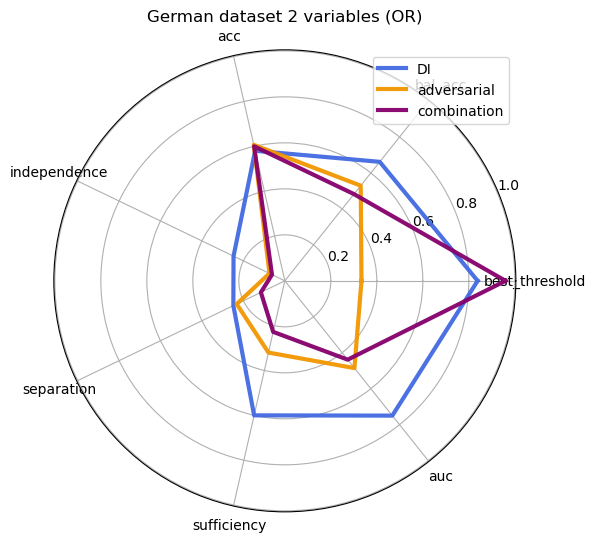

C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values[method1] = resultsInd.loc[default_labels[method1]].tolist() + [resultsInd.loc[default_labels[method1]][0]]
C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values[method2] = resultsInd.loc[default_labels[method2]].tolist() + [resultsInd.loc[default_labels[method2]][0]]
C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, 

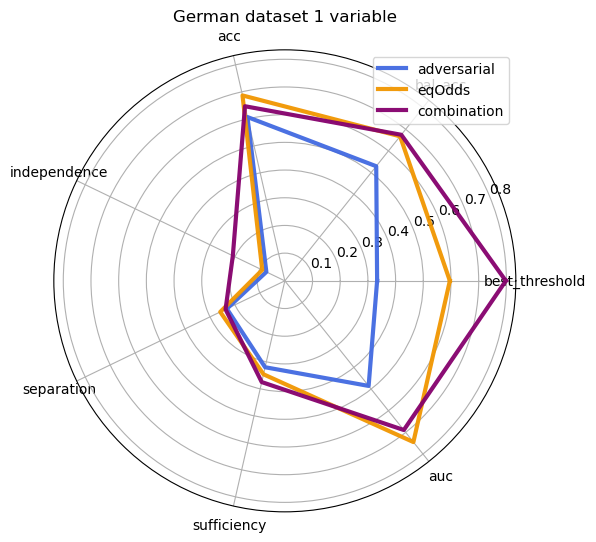

C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values[method1] = resultsInd.loc[default_labels[method1]].tolist() + [resultsInd.loc[default_labels[method1]][0]]
C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values[method2] = resultsInd.loc[default_labels[method2]].tolist() + [resultsInd.loc[default_labels[method2]][0]]
C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, 

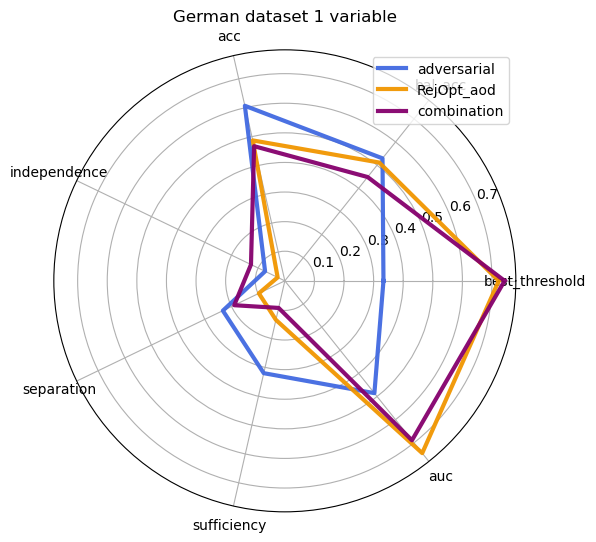

C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values[method1] = resultsInd.loc[default_labels[method1]].tolist() + [resultsInd.loc[default_labels[method1]][0]]
C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values[method2] = resultsInd.loc[default_labels[method2]].tolist() + [resultsInd.loc[default_labels[method2]][0]]
C:\Users\Arturo\AppData\Local\Temp\ipykernel_21072\2331054049.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, 

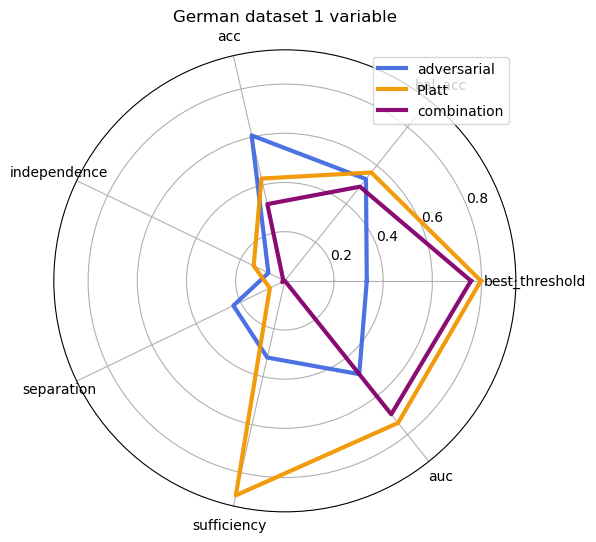

In [20]:
from math import pi


def plot_spider(resultsInd, resultsCom, method1, method2):

    cathegories = list(resultsInd.columns)

    values = dict()
    values[method1] = dict()
    values[method2] = dict()

    default_labels = {
        'RW': 'RW_logreg',
        'DI': 'DI_logreg',
        'adversarial': 'adversarial',
        'metafair': 'metafair_sr',
        'pir': 'pir',
        'Platt': 'logreg_Platt',
        'eqOdds': 'logreg_eqOdds',
        'RejOpt': 'logreg_RejOpt_spd',
        'RejOpt_aod': 'logreg_RejOpt_aod'
        }

    if \
        (method1 in preproc and method2 in inproc) or \
        (method1 in inproc and method2 in postproc):
        com_name = method1 + '_' + method2
    else:
        com_name = default_labels[method1] + '_' + default_labels[method2]  

    values[com_name] = dict()

    values[method1] = resultsInd.loc[default_labels[method1]].tolist() + [resultsInd.loc[default_labels[method1]][0]]
    values[method2] = resultsInd.loc[default_labels[method2]].tolist() + [resultsInd.loc[default_labels[method2]][0]] 
    values[com_name] = resultsCom.loc[com_name].tolist() + [resultsCom.loc[com_name][0]]

    N = len(cathegories)
    angles = [n / float(N) * 2 * pi for n in range(N)] + [0]

    # Create a plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'})
    ax.plot(angles, values[method1], label=method1, linewidth=3, alpha = 0.95, color = "#4169E1")
#    ax.fill(angles, values[method1], alpha=0.25)
    ax.plot(angles, values[method2], label=method2, linewidth=3, alpha = 0.95, color = "#f19600")
#    ax.fill(angles, values[method2], alpha=0.25)
    ax.plot(angles, values[com_name], label="combination", linewidth=3, alpha = 0.95, color = "#85006c")
#    ax.fill(angles, values[com_name], alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(cathegories)
    plt.legend()
    return fig, ax

preproc = ['RW', 'DI']
inproc = ['pir', 'adversarial', 'metafair']
postproc = ['eqOdds', 'RejOpt_aod', 'Platt']


for method in preproc:
    fig, ax = plot_spider(resultsDict['German']['German1V_ind_1'], resultsDict['German']['German1V_com_1'], method, 'adversarial')
    ax.set_title('German dataset 1 variable')
    plt.show()

for method in postproc:
    fig, ax = plot_spider(resultsDict['German']['German1V_ind_1'], resultsDict['German']['German1V_com_1'], 'adversarial', method)
    ax.set_title('German dataset 1 variable')
    plt.show()

for method in preproc:
    fig, ax = plot_spider(resultsDict['German']['German2V_OR_ind_1'], resultsDict['German']['German2V_OR_com_1'], method, 'adversarial')
    ax.set_title('German dataset 2 variables (OR)')
    plt.show()

for method in postproc:
    fig, ax = plot_spider(resultsDict['German']['German2V_OR_ind_1'], resultsDict['German']['German2V_OR_com_1'], 'adversarial', method)
    ax.set_title('German dataset 1 variable')
    plt.show()

In [21]:
resultsDict['German']['German1V_ind_1'].index

Index(['logreg', 'xgboost', 'RW_logreg', 'DI_logreg', 'RW_xgboost',
       'DI_xgboost', 'metafair_sr', 'metafair_fdr', 'pir', 'adversarial',
       'logreg_Platt', 'logreg_eqOdds', 'logreg_eqOdds_weighted',
       'logreg_eqOdds_fnr', 'logreg_eqOdds_fpr', 'logreg_RejOpt_spd',
       'logreg_RejOpt_aod', 'logreg_RejOpt_eod', 'xgboost_Platt',
       'xgboost_eqOdds', 'xgboost_eqOdds_weighted', 'xgboost_eqOdds_fnr',
       'xgboost_eqOdds_fpr', 'xgboost_RejOpt_spd', 'xgboost_RejOpt_aod',
       'xgboost_RejOpt_eod'],
      dtype='object')

<Figure size 800x600 with 0 Axes>

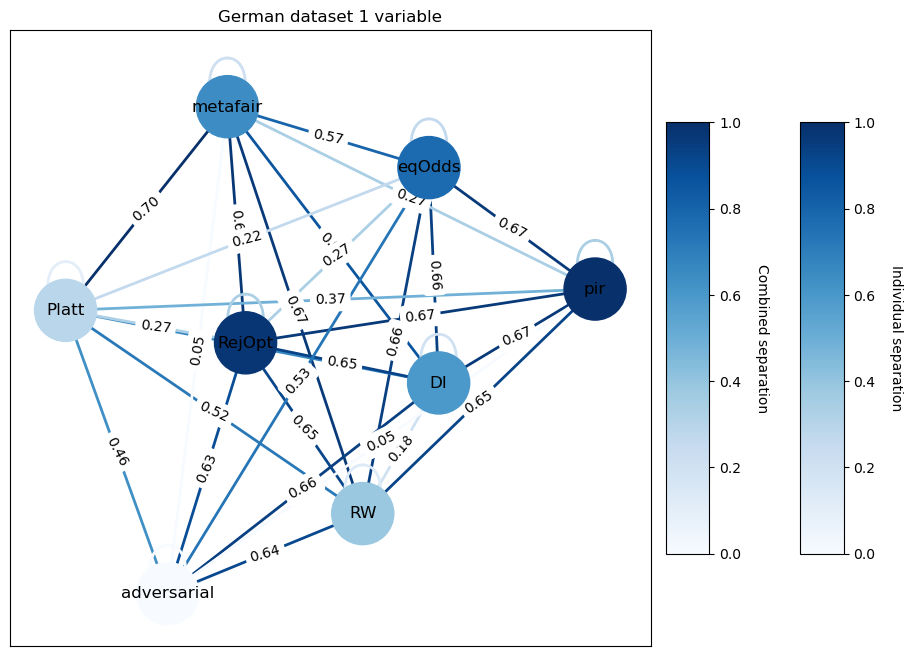

<Figure size 800x600 with 0 Axes>

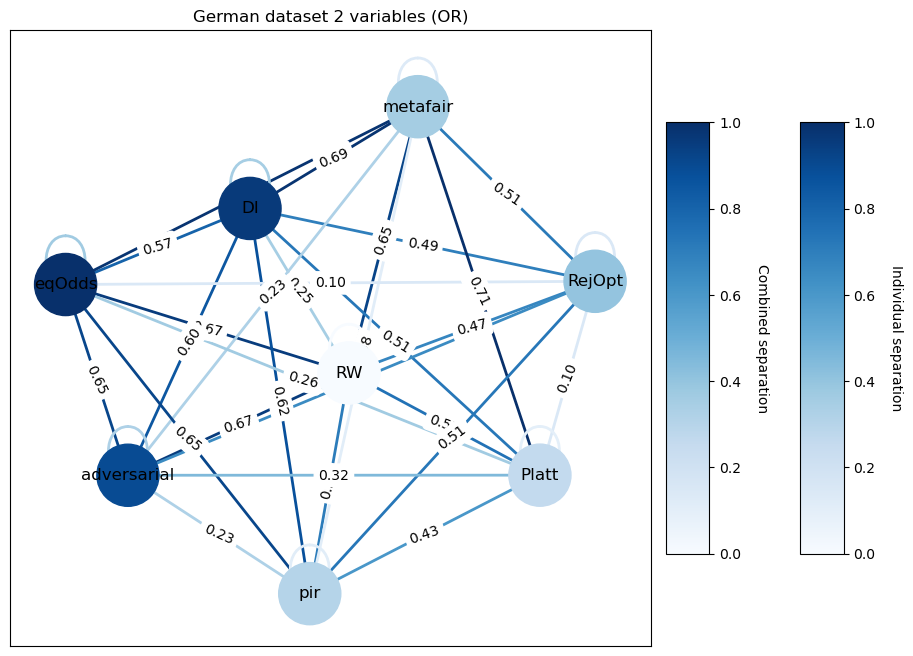

<Figure size 800x600 with 0 Axes>

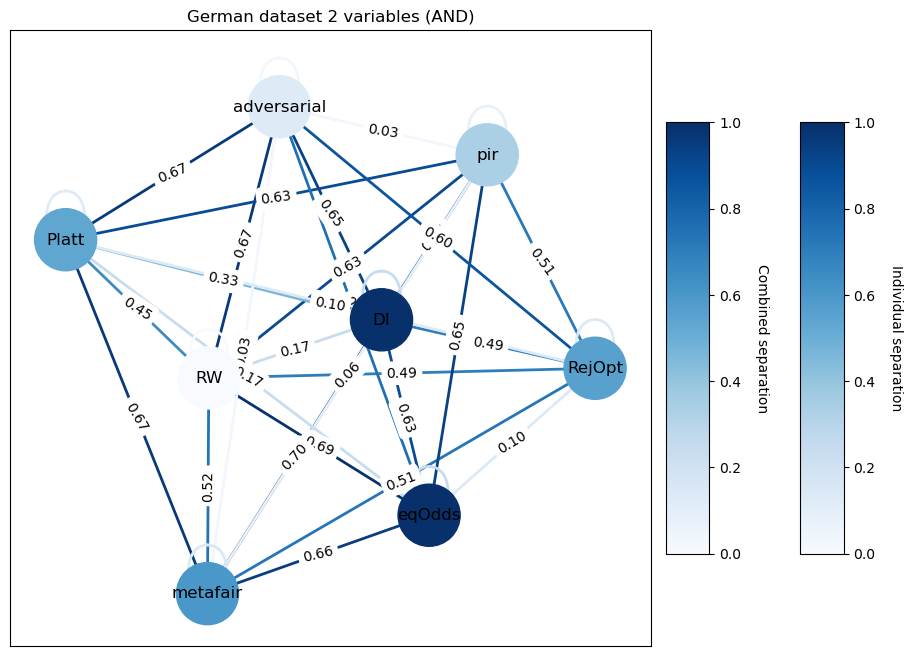

<Figure size 800x600 with 0 Axes>

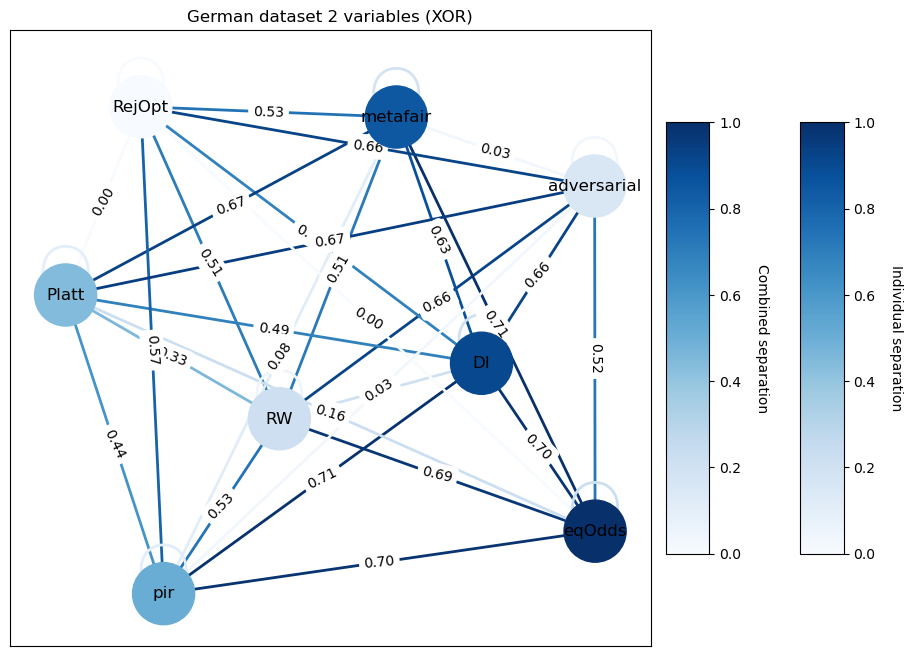

In [49]:
preproc = ['RW', 'DI']
inproc = ['metafair', 'pir', 'adversarial']
postproc = ['Platt', 'eqOdds', 'RejOpt']

proc = preproc + inproc + postproc

def graph_visualization(resultsInd, resultsCom, metric, title = ""):

    matrices = combination_matrix(resultsInd, resultsCom)
    matrix_metric = matrices[metric]

    plt.figure(figsize=(8, 6))

    # Crear grafo
    G = nx.Graph()

    # Agregar nodos y relaciones
    proc = preproc + inproc + postproc
    combinations = [(node1, node2) for node1 in proc for node2 in proc]
    weights = [matrix_metric.loc[node1, node2] for node1 in proc for node2 in proc] 
    individual_performance = {node1: matrix_metric.loc[node1, node1] for node1 in proc}

    G.add_nodes_from(proc)
    for comb, weight in zip(combinations, weights):
        G.add_edge(comb[0], comb[1], weight=weight)

    # Colores de los nodos según desempeño individual
    node_colors = [individual_performance[node] for node in G.nodes()]
    node_color_map = plt.cm.Blues  # Escala de color para nodos

    # Colores de las aristas según desempeño conjunto
    edge_colors = [G[u][v]['weight'] for u, v in G.edges()]
    edge_color_map = plt.cm.Blues  # Escala de color para aristas

    # Layout del grafo
    pos = nx.spring_layout(G)

    # Crear figura más grande
    fig, ax = plt.subplots(figsize=(12, 8))  # Aumentar tamaño de la figura

    # Dibujar nodos con colores
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=node_color_map, node_size=2000)
    nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

    # Dibujar aristas con colores
    edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=edge_color_map, width=2)

    # Dibujar etiquetas de aristas (redondeadas a 2 decimales)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    edge_labels = {k: f"{v:.2f}" for k, v in edge_labels.items()}  # Redondear a 2 decimales
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    # Barra de color para los nodos
    sm_nodes = plt.cm.ScalarMappable(cmap=node_color_map, norm=plt.Normalize(vmin=0, vmax=1))
    sm_nodes.set_array([])
    cbar_nodes = plt.colorbar(sm_nodes, ax = ax, shrink=0.7, aspect=10, pad=0.02)
    cbar_nodes.set_label('Individual ' + metric, rotation=270, labelpad=20)

    # Barra de color para las aristas
    sm_edges = plt.cm.ScalarMappable(cmap=edge_color_map, norm=plt.Normalize(vmin=0, vmax=1))
    sm_edges.set_array([])
    cbar_edges = plt.colorbar(sm_edges, ax = ax, shrink=0.7, aspect=10, pad=0.02)
    cbar_edges.set_label('Combined ' + metric, rotation=270, labelpad=20)

    plt.title(title)
    plt.show()



graph_visualization(resultsDict['German']['German1V_ind_1'], resultsDict['German']['German1V_com_1'], 'separation',
                              title = "German dataset 1 variable")

graph_visualization(resultsDict['German']['German2V_OR_ind_1'], resultsDict['German']['German2V_OR_com_1'], 'separation',
                              title = "German dataset 2 variables (OR)")

graph_visualization(resultsDict['German']['German2V_AND_ind_1'], resultsDict['German']['German2V_AND_com_1'], 'separation',
                              title = "German dataset 2 variables (AND)")

graph_visualization(resultsDict['German']['German2V_XOR_ind_1'], resultsDict['German']['German2V_XOR_com_1'], 'separation',
                              title = "German dataset 2 variables (XOR)")
